In [2]:
#Dataset S3 Location
#Importing Raw Datasets from AWS S3
!aws s3 ls s3://ads508rawdatasets/CSV/OHSU_BeatAML_ClinicalSummary/

2023-03-27 03:13:36          0 
2023-03-27 03:13:59     712668 OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [3]:
!aws s3 ls s3://ads508rawdatasets/CSV/OpenCell_ProteinInteraction/

2023-03-27 03:15:14          0 
2023-03-27 03:17:18    4568928 opencell-protein-interactions.csv


In [4]:
#Check pre-requisites from the 01_setup Folder
%store -r setup_instance_check_passed

In [5]:
try:
    setup_instance_check_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Instance Check.")
    print("+++++++++++++++++++++++++++++++")

In [6]:
print(setup_instance_check_passed)

True


In [7]:
%store -r setup_s3_bucket_passed

In [8]:
try:
    setup_s3_bucket_passed
except NameError:
    print("+++++++++++++++++++++++++++++++")
    print("[ERROR] YOU HAVE TO RUN ALL NOTEBOOKS IN THE SETUP FOLDER FIRST. You are missing Setup S3 Bucket.")
    print("+++++++++++++++++++++++++++++++")

In [9]:
print(setup_s3_bucket_passed)

True


In [10]:
%store -r setup_iam_roles_passed

In [11]:


import boto3
import sagemaker
import time
from time import gmtime, strftime

sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()
bucket = sagemaker_session.default_bucket()
region = boto3.Session().region_name

from botocore.config import Config

config = Config(retries={"max_attempts": 10, "mode": "adaptive"})

iam = boto3.client("iam", config=config)



In [12]:
import boto3
import sagemaker
import pandas as pd

sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name
account_id = boto3.client("sts").get_caller_identity().get("Account")

sm = boto3.Session().client(service_name="sagemaker", region_name=region)

In [13]:
role_name = role.split("/")[-1]

print("Role name: {}".format(role_name))

Role name: AmazonSageMaker-ExecutionRole-20230319T210510


In [14]:
%store

Stored variables and their in-db values:
ingest_create_athena_db_passed             -> False
s3_private_path_csv                        -> 's3://sagemaker-us-west-2-135966665220/cell_data'
s3_public_path_clsm                        -> 's3://ads508rawdatasets/CSV/OHSU_BeatAML_ClinicalS
s3_public_path_pi                          -> 's3://ads508rawdatasets/CSV/OpenCell_ProteinIntera
setup_iam_roles_passed                     -> False
setup_instance_check_passed                -> True
setup_s3_bucket_passed                     -> True


In [15]:
#Set S3 Source Location
#BeatAML Clinical Summary
s3_public_path_clsm = "s3://ads508rawdatasets/CSV/OHSU_BeatAML_ClinicalSummary/"


In [16]:
%store s3_public_path_clsm

Stored 's3_public_path_clsm' (str)


In [17]:
print(s3_public_path_clsm)

s3://ads508rawdatasets/CSV/OHSU_BeatAML_ClinicalSummary/


In [18]:
!aws s3 ls $s3_public_path_clsm

2023-03-27 03:13:36          0 
2023-03-27 03:13:59     712668 OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [19]:
#BeatAML OpenCell Protein Interaction
s3_public_path_pi = "s3://ads508rawdatasets/CSV/OpenCell_ProteinInteraction/"

In [20]:
%store s3_public_path_pi

Stored 's3_public_path_pi' (str)


In [21]:
print(s3_public_path_pi)

s3://ads508rawdatasets/CSV/OpenCell_ProteinInteraction/


In [22]:
!aws s3 ls $s3_public_path_pi

2023-03-27 03:15:14          0 
2023-03-27 03:17:18    4568928 opencell-protein-interactions.csv


In [23]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="blank" href="https://s3.console.aws.amazon.com/s3/buckets/team4rawdatasets?prefix=CSV/Input/&region=us-east-1">S3 Bucket</a></b>'.format(
            region, account_id, region
        )
    )
)

In [24]:
#Athena Database: PyAthena is a Python DB API 2.0 (PEP 249) compliant client for Amazon Athena
!pip install --disable-pip-version-check -q PyAthena==2.1.0
from pyathena import connect

In [25]:
ingest_create_athena_db_passed = False

In [26]:
database_name = "bcr"

In [27]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)

In [28]:
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)

In [29]:
statement0 = "CREATE DATABASE IF NOT EXISTS {}".format(database_name)
print(statement0)

CREATE DATABASE IF NOT EXISTS bcr


In [30]:
statement00 = "SHOW DATABASES"

df_show = pd.read_sql(statement00, conn)
df_show.head(5)

,database_name
0,aws508bcr
1,default


In [31]:
if database_name in df_show.values:
    ingest_create_athena_db_passed = True


In [32]:
%store ingest_create_athena_db_passed

Stored 'ingest_create_athena_db_passed' (bool)


In [33]:
from IPython.core.display import display, HTML

display(
    HTML(
        '<b>Review <a target="top" href="https://us-east-1.console.aws.amazon.com/glue/home?region=us-east-1#/v2/data-catalog/tables">AWS Glue Catalog</a></b>'.format(
            region
        )
    )
)

In [34]:


# Set Athena database & table
table_clsm = "ohsu_beataml_clinicalsummary"
table_pi = "opencell_proteininteraction"



In [35]:
import numpy as np
import seaborn as sns
!pip install klib
import klib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 17.3 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [36]:
# SQL statement
statement2 = """
SELECT *
FROM {}.{} 
""".format(
    database_name, table_clsm
)

print(statement2)


SELECT *
FROM bcr.ohsu_beataml_clinicalsummary 



In [37]:
!pip install klib

In [38]:
!aws s3 ls s3://ads508rawdatasets/

                           PRE CSV/
                           PRE queries/
2023-03-20 03:03:47     712668 OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv
2023-03-20 03:04:55    3909901 opencell-protein-interactions.csv


In [39]:
!aws s3 ls s3://ads508rawdatasets/CSV/

                           PRE OHSU_BeatAML_ClinicalSummary/
                           PRE OpenCell_ProteinInteraction/
2023-03-27 03:13:15          0 


In [40]:
!aws s3 cp 's3://ads508rawdatasets/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv' ./data/

download: s3://ads508rawdatasets/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv to data/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv


In [41]:
import csv

df = pd.read_csv('s3://ads508rawdatasets/OHSU_BeatAMLWaves1_2_Tyner_ClinicalSummary.csv')

In [42]:
df.head(5)

,LabId,PatientId,consensus_sex,inferred_sex,inferred_ethnicity,centerID,CEBPA_Biallelic,ageAtDiagnosis,isRelapse,isDenovo,...,STAG2,STAT3,SUZ12,TCL1A,TET2,TP53,TYK2,U2AF1,WT1,ZRSR2
0,09-00705,163,Male,Male,White,1,n,73.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10-00136,174,Male,Male,White,1,n,69.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10-00172,175,Female,Male,White,1,n,59.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10-00507,45,Female,Female,White,1,n,70.0,False,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10-00542,174,Male,Male,White,1,n,69.0,True,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Columns: 159 entries, LabId to ZRSR2
dtypes: bool(9), float64(22), int64(7), object(121)
memory usage: 793.5+ KB


In [44]:
#Create new dataframe to retain features for further use
df = pd.DataFrame(df[['LabId', 'PatientId', 'consensus_sex', 'inferred_ethnicity', 'isRelapse',
                             'isTransformed', 'priorMalignancyNonMyeloid', 'priorMDS', 'priorMDSMPN', 'priorMPN',
                             'ELN2017', 'dxAtSpecimenAcquisition', 'vitalStatus', 'overallSurvival', 'FLT3-ITD', 'NPM1']])

In [45]:
df.head()

,LabId,PatientId,consensus_sex,inferred_ethnicity,isRelapse,isTransformed,priorMalignancyNonMyeloid,priorMDS,priorMDSMPN,priorMPN,ELN2017,dxAtSpecimenAcquisition,vitalStatus,overallSurvival,FLT3-ITD,NPM1
0,09-00705,163,Male,White,False,False,n,n,n,n,FavorableOrIntermediate,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,425.0,positive,positive
1,10-00136,174,Male,White,False,False,n,n,n,n,Adverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,419.0,positive,negative
2,10-00172,175,Female,White,False,False,n,n,n,n,IntermediateOrAdverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,541.0,positive,negative
3,10-00507,45,Female,White,False,False,n,n,n,n,FavorableOrIntermediate,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,511.0,positive,positive
4,10-00542,174,Male,White,True,False,n,n,n,n,Adverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,419.0,positive,negative


In [46]:
df.tail()

,LabId,PatientId,consensus_sex,inferred_ethnicity,isRelapse,isTransformed,priorMalignancyNonMyeloid,priorMDS,priorMDSMPN,priorMPN,ELN2017,dxAtSpecimenAcquisition,vitalStatus,overallSurvival,FLT3-ITD,NPM1
667,17-00072,4366,Male,White,False,True,n,n,n,y,Intermediate,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Dead,362.0,negative,negative
668,17-00077,4317,Female,White,False,False,n,n,n,n,Favorable,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Unknown,NaN,negative,negative
669,17-00093,4379,Female,Black,False,True,n,n,n,y,Intermediate,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Unknown,NaN,positive,negative
670,17-00094,4380,Male,White,False,True,n,n,n,y,Adverse,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Alive,153.0,negative,negative
671,17-00096,2747,Male,White,False,True,n,n,y,n,Intermediate,ACUTE MYELOID LEUKAEMIA (AML) AND RELATED PREC...,Alive,256.0,negative,negative


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LabId                      672 non-null    object 
 1   PatientId                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         670 non-null    object 
 4   isRelapse                  672 non-null    bool   
 5   isTransformed              672 non-null    bool   
 6   priorMalignancyNonMyeloid  672 non-null    object 
 7   priorMDS                   672 non-null    object 
 8   priorMDSMPN                672 non-null    object 
 9   priorMPN                   672 non-null    object 
 10  ELN2017                    672 non-null    object 
 11  dxAtSpecimenAcquisition    672 non-null    object 
 12  vitalStatus                672 non-null    object 
 13  overallSurvival            607 non-null    float64

In [48]:
#Exploratory Data Analysis (EDA)
df.describe()

,PatientId,overallSurvival
count,672.000000,607.000000
mean,2088.020833,441.881384
std,973.372734,479.180429
min,17.000000,-1.000000
25%,1450.750000,167.000000
50%,2016.000000,323.000000
75%,2501.500000,555.000000
max,4380.000000,5305.000000


In [49]:
import numpy as np
import seaborn as sns
import klib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [50]:
#remove duplicated columns
df = df.loc[:, ~df.columns.duplicated()]

In [51]:
df.duplicated().sum()

0

In [ ]:
#There are no duplicate values

In [52]:
#get number of rows and columns
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1], '\n')

# inspect datatypes and nulls
data_types = df.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.assign(Null_Values = 
                               df.isnull().sum())
data_types.reset_index(inplace = True)
data_types.rename(columns={0:'Data Type',
                          'index': 'Column/Variable',
                          'Null_Values': "# of Nulls"})

Number of Rows: 672
Number of Columns: 16 



,Column/Variable,Data Type,# of Nulls
0,LabId,object,0
1,PatientId,int64,0
2,consensus_sex,object,0
3,inferred_ethnicity,object,2
4,isRelapse,bool,0
5,isTransformed,bool,0
6,priorMalignancyNonMyeloid,object,0
7,priorMDS,object,0
8,priorMDSMPN,object,0
9,priorMPN,object,0


In [53]:
#Missing data
df = df.replace('', np.NAN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   LabId                      672 non-null    object 
 1   PatientId                  672 non-null    int64  
 2   consensus_sex              672 non-null    object 
 3   inferred_ethnicity         670 non-null    object 
 4   isRelapse                  672 non-null    bool   
 5   isTransformed              672 non-null    bool   
 6   priorMalignancyNonMyeloid  672 non-null    object 
 7   priorMDS                   672 non-null    object 
 8   priorMDSMPN                672 non-null    object 
 9   priorMPN                   672 non-null    object 
 10  ELN2017                    672 non-null    object 
 11  dxAtSpecimenAcquisition    672 non-null    object 
 12  vitalStatus                672 non-null    object 
 13  overallSurvival            607 non-null    float64

GridSpec(6, 6)

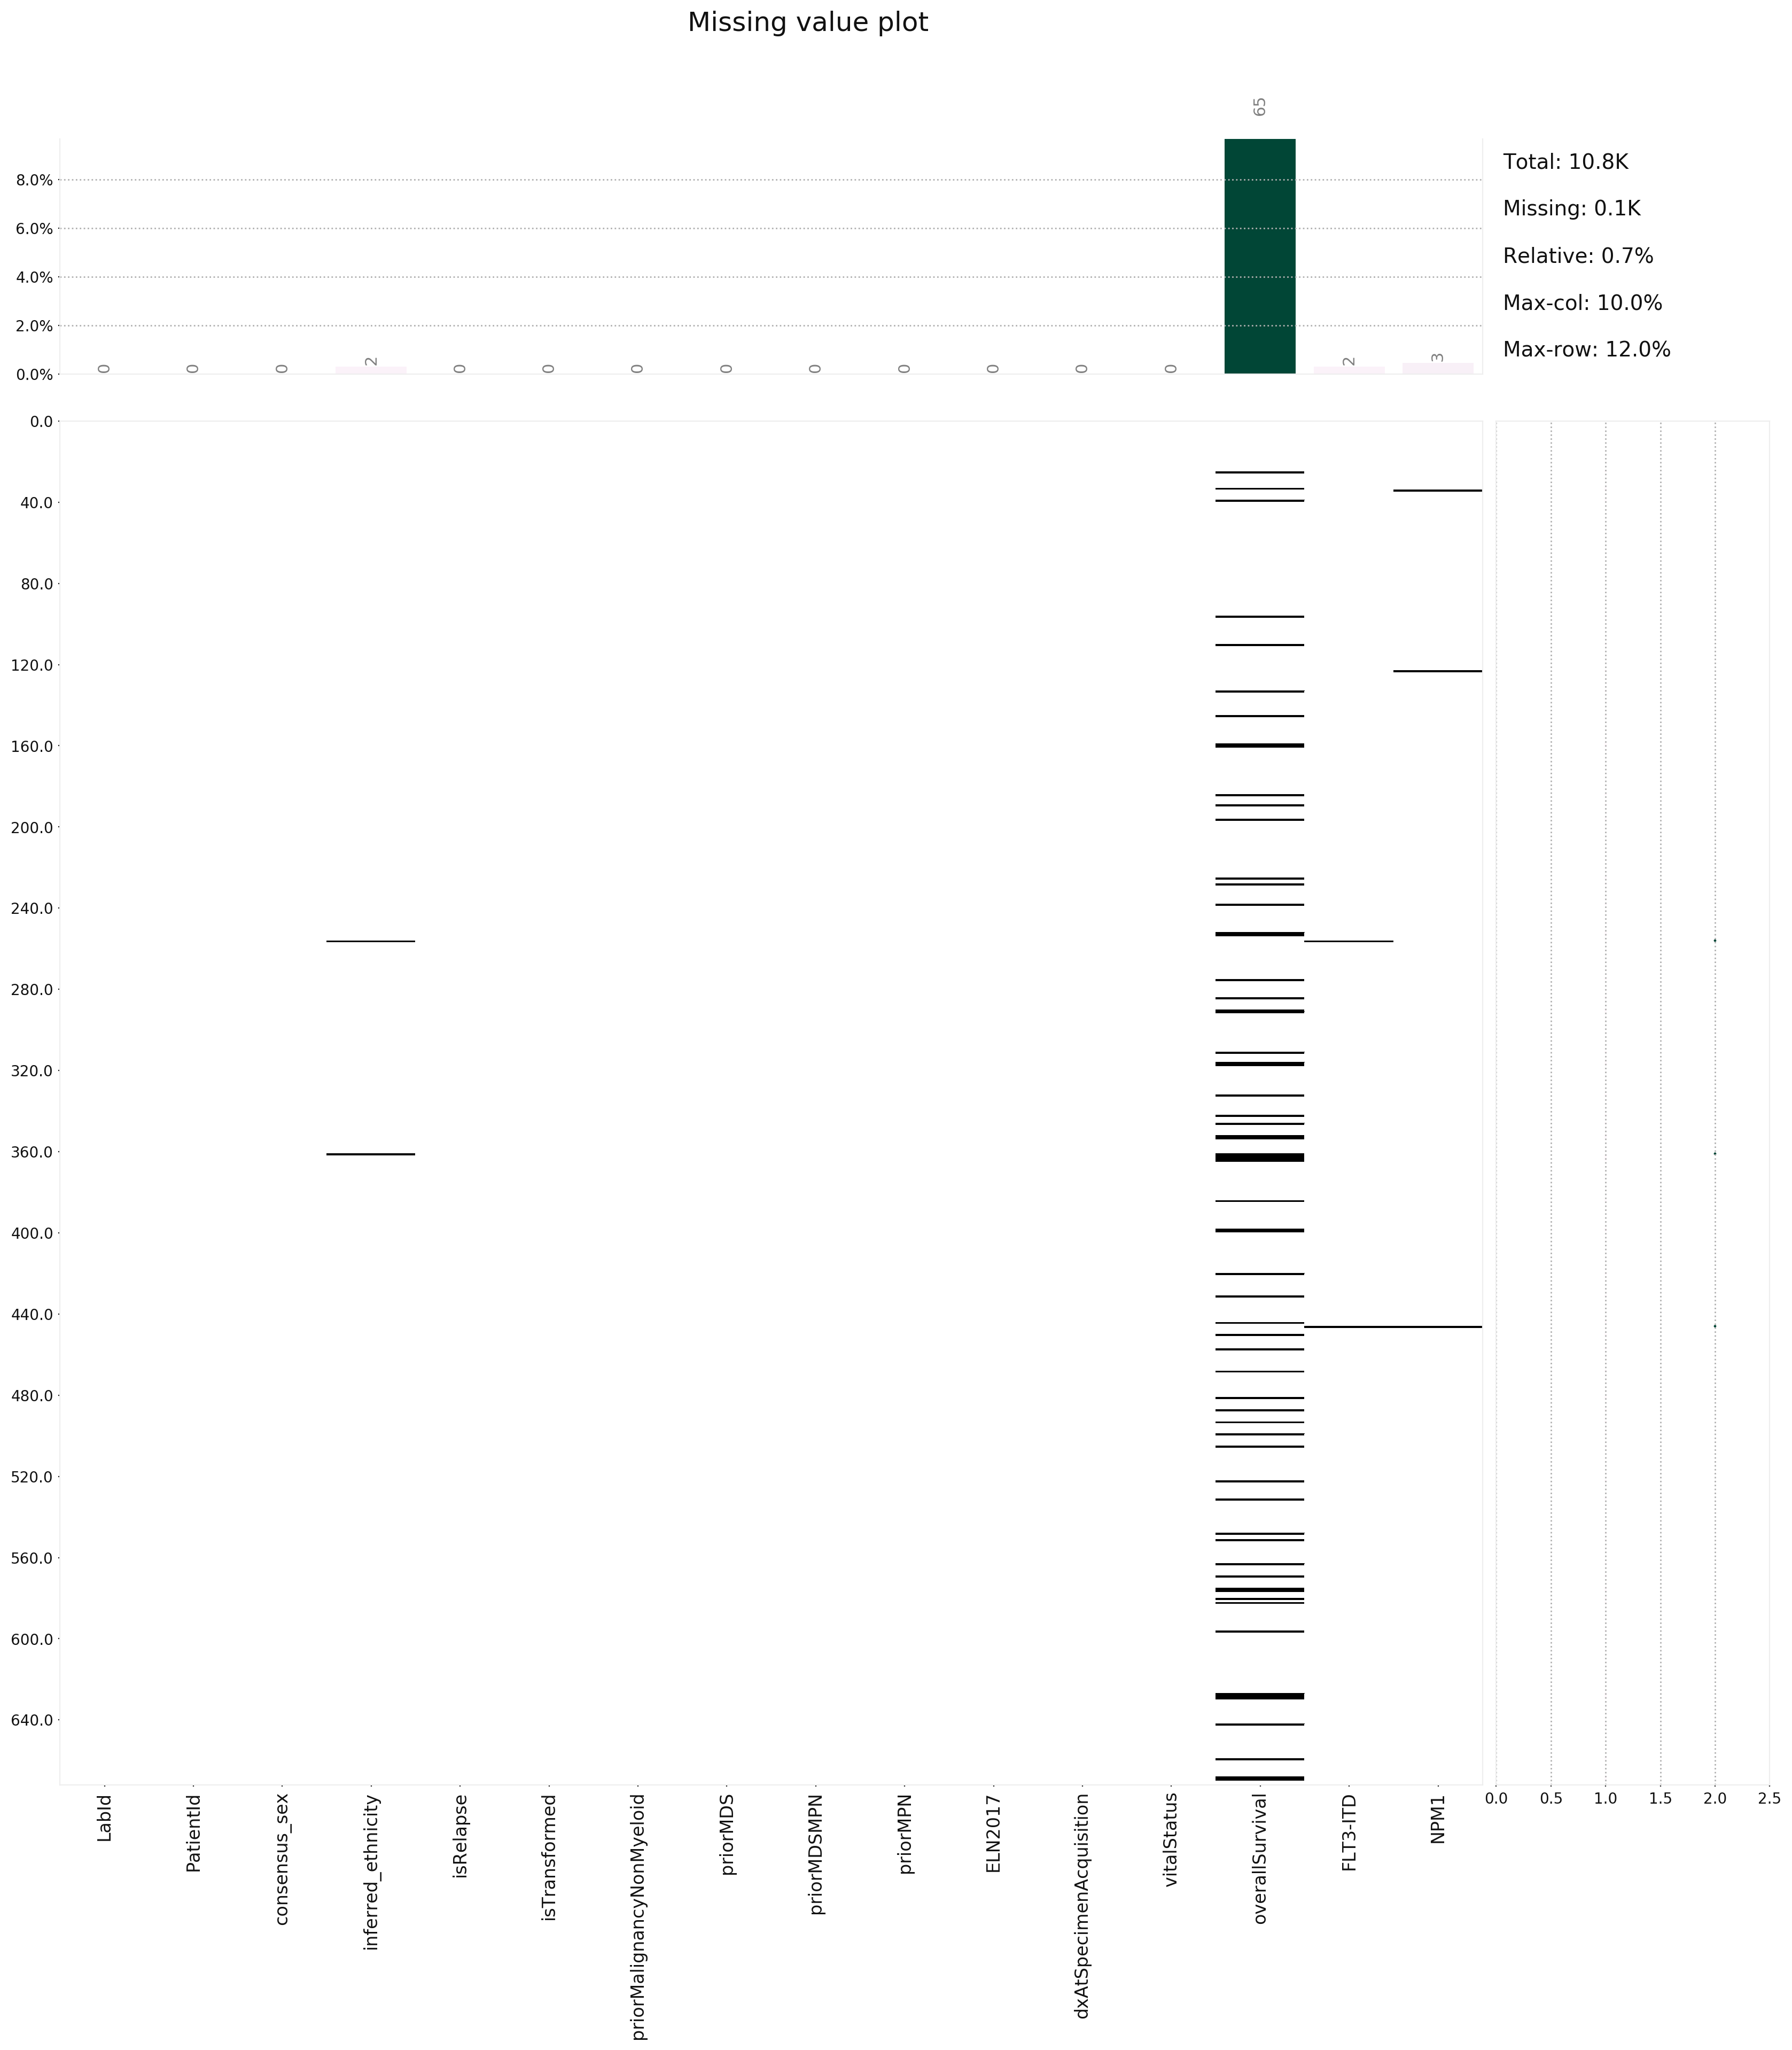

In [54]:
klib.missingval_plot(df)

In [76]:
df['overallSurvival'] = df['overallSurvival'].fillna(df['overallSurvival'].median())

In [77]:
df = df.replace(np.nan, 'unknown', regex=True)

In [78]:
klib.missingval_plot(df)

No missing values found in the dataset.


In [79]:
df['ELN2017'].value_counts()

Adverse                    242
Intermediate               235
Favorable                  155
FavorableOrIntermediate     27
IntermediateOrAdverse       11
Unknown                      2
Name: ELN2017, dtype: int64

In [80]:
#Bias Exploration
ELN2017_adverse = df['ELN2017'].value_counts()['Adverse']
ELN2017_intermediate = df['ELN2017'].value_counts()['Intermediate']
ELN2017_favorable = df['ELN2017'].value_counts()['Favorable']
ELN2017_fav_int = df['ELN2017'].value_counts()['FavorableOrIntermediate']
ELN2017_int_ad = df['ELN2017'].value_counts()['IntermediateOrAdverse']
ELN2017_unknown = df['ELN2017'].value_counts()['Unknown']
ELN2017_total = ELN2017_adverse + ELN2017_intermediate + ELN2017_favorable + ELN2017_fav_int + ELN2017_int_ad + ELN2017_unknown

!pip install PrettyTable

from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ['Adverse', 'Intermediate', 'Favorable', 'FavorableOrIntermediate', 'IntermediateOrAdverse', 'Unknown', 'Total']
table.add_row([ELN2017_adverse, ELN2017_intermediate, ELN2017_favorable, ELN2017_fav_int, ELN2017_int_ad, ELN2017_unknown, ELN2017_total])
table

Adverse,Intermediate,Favorable,FavorableOrIntermediate,IntermediateOrAdverse,Unknown,Total
242,235,155,27,11,2,672


In [81]:
perc_adverse = ELN2017_adverse /(ELN2017_total)
perc_intermediate = ELN2017_intermediate /(ELN2017_total)
perc_favorable = ELN2017_favorable /(ELN2017_total)
perc_fav_int = ELN2017_fav_int /(ELN2017_total)
perc_int_ad = ELN2017_int_ad /(ELN2017_total)
perc_unknown = ELN2017_unknown /(ELN2017_total)

print(round(perc_adverse, 2)*100, '% of patients are at adverse risk')
print(round(perc_intermediate, 2)*100, '% of patients are at intermediate risk')
print(round(perc_favorable, 2)*100, '% of patients are at favorable risk')
print(round(perc_fav_int, 2)*100, '% of patients are either at favorable or intermediate risk')
print(round(perc_int_ad, 2)*100, '% of patients are either at intermediate or adverse risk')
print(round(perc_int_ad, 2)*100, '% of patients are at unknown risk')

36.0 % of patients are at adverse risk
35.0 % of patients are at intermediate risk
23.0 % of patients are at favorable risk
4.0 % of patients are either at favorable or intermediate risk
2.0 % of patients are either at intermediate or adverse risk
2.0 % of patients are at unknown risk


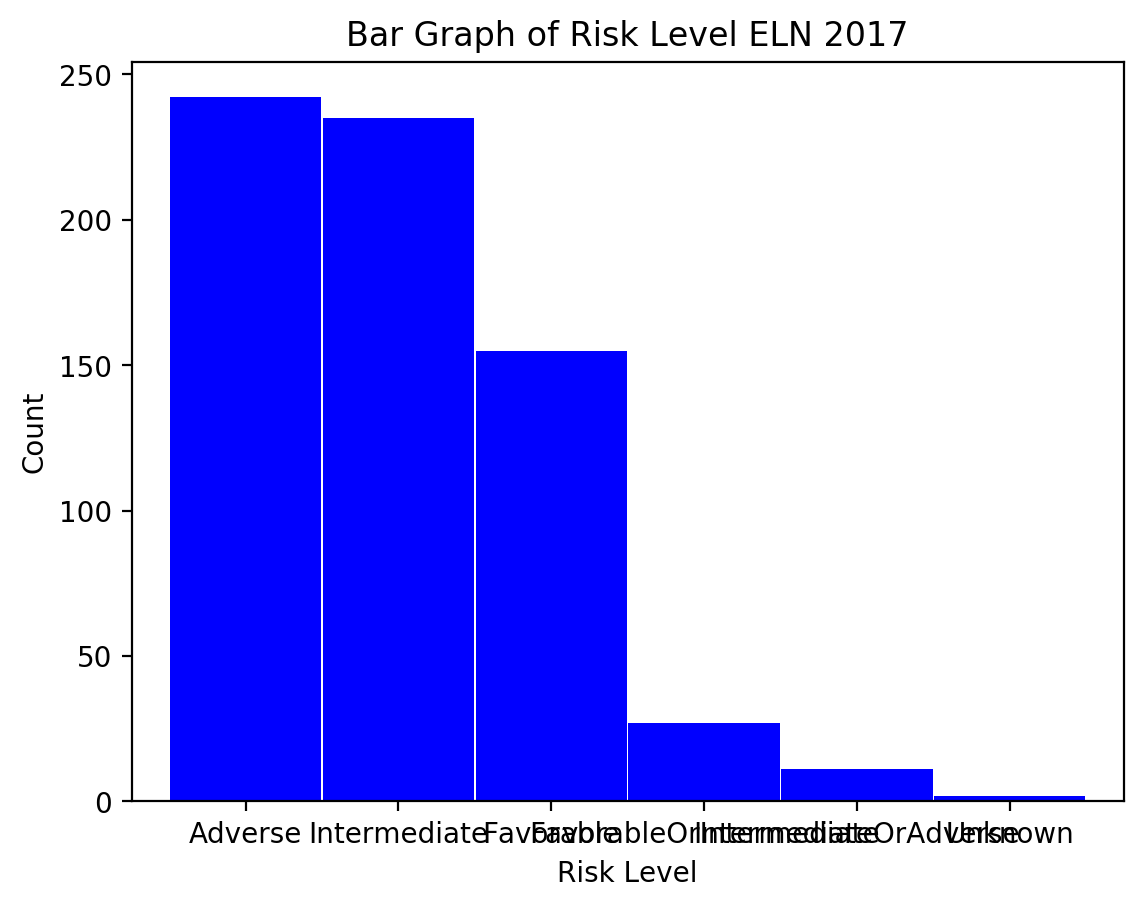

Adverse                    242
Intermediate               235
Favorable                  155
FavorableOrIntermediate     27
IntermediateOrAdverse       11
Unknown                      2
Name: ELN2017, dtype: int64

In [82]:
# risk level bar graph
risk_level = df['ELN2017'].value_counts()
fig = plt.figure()
risk_level.plot.bar(x ='lab', y='val', rot=0, width=0.99, 
                         color="blue")
plt.title ('Bar Graph of Risk Level ELN 2017')
plt.xlabel('Risk Level') 
plt.ylabel('Count')
plt.show()

risk_level

In [84]:
#Summary Statistics
sum_stats = pd.DataFrame(df['ELN2017'].describe())
sum_stats

,ELN2017
count,672
unique,6
top,Adverse
freq,242


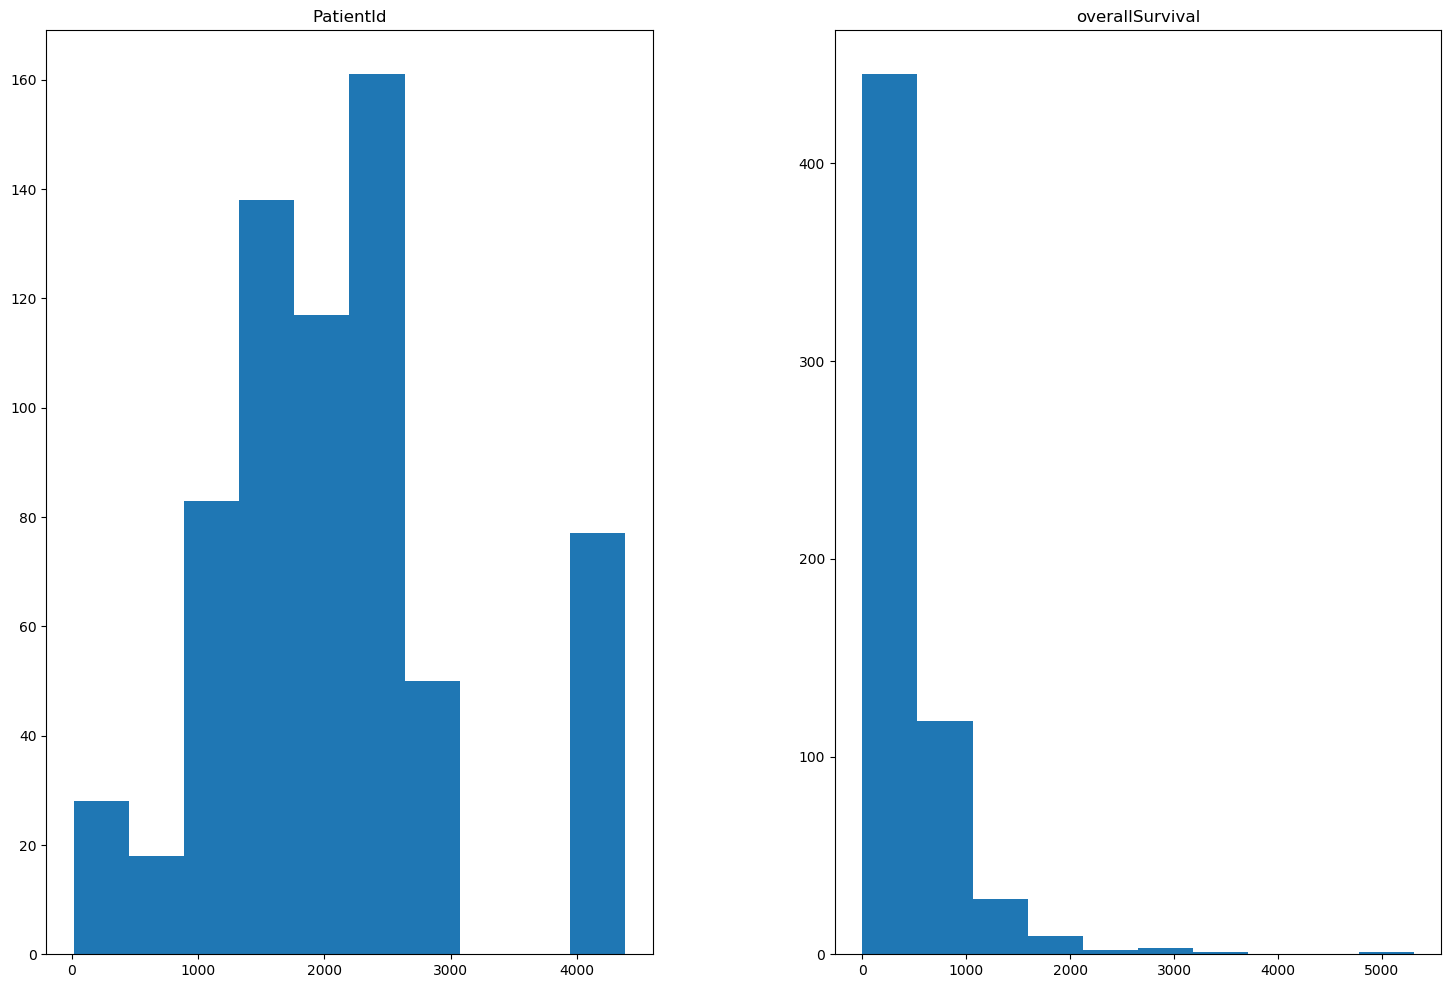

In [83]:
df.hist(grid=False, figsize=(18,12))
plt.show()

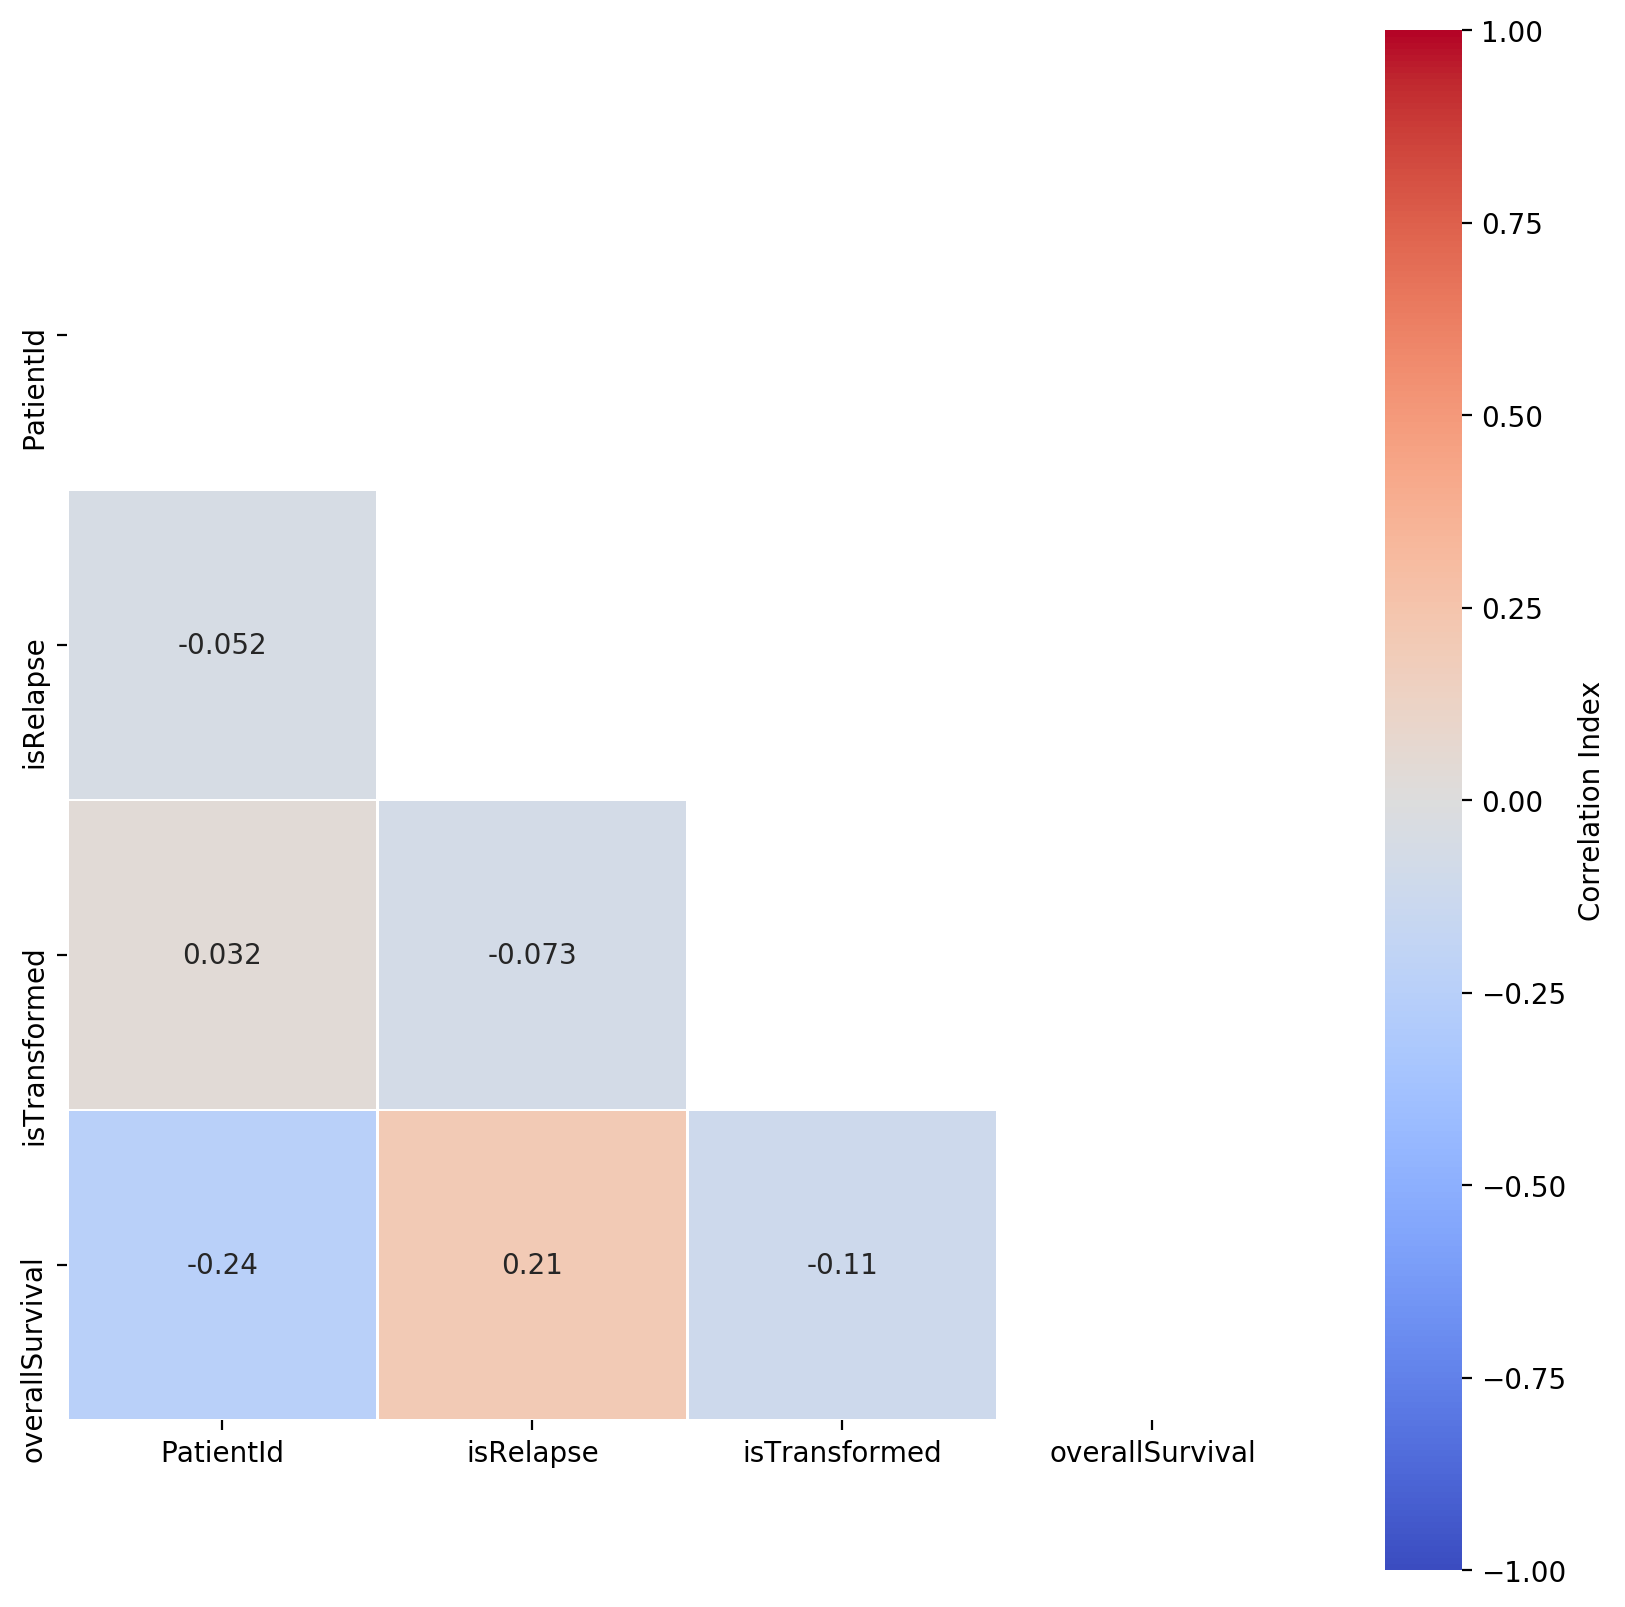

In [85]:
# assign correlation function to new variable
corr = df.corr()
matrix = np.triu(corr) # for triangular matrix
plt.figure(figsize=(10,10))
# parse corr variable intro triangular matrix
sns.heatmap(df.corr(method='pearson'), 
            annot=True, linewidths=.5, 
            cmap="coolwarm", mask=matrix,
            square = True, 
            cbar_kws={'label': 'Correlation Index'}, 
            vmin=-1, vmax=1)
plt.show()

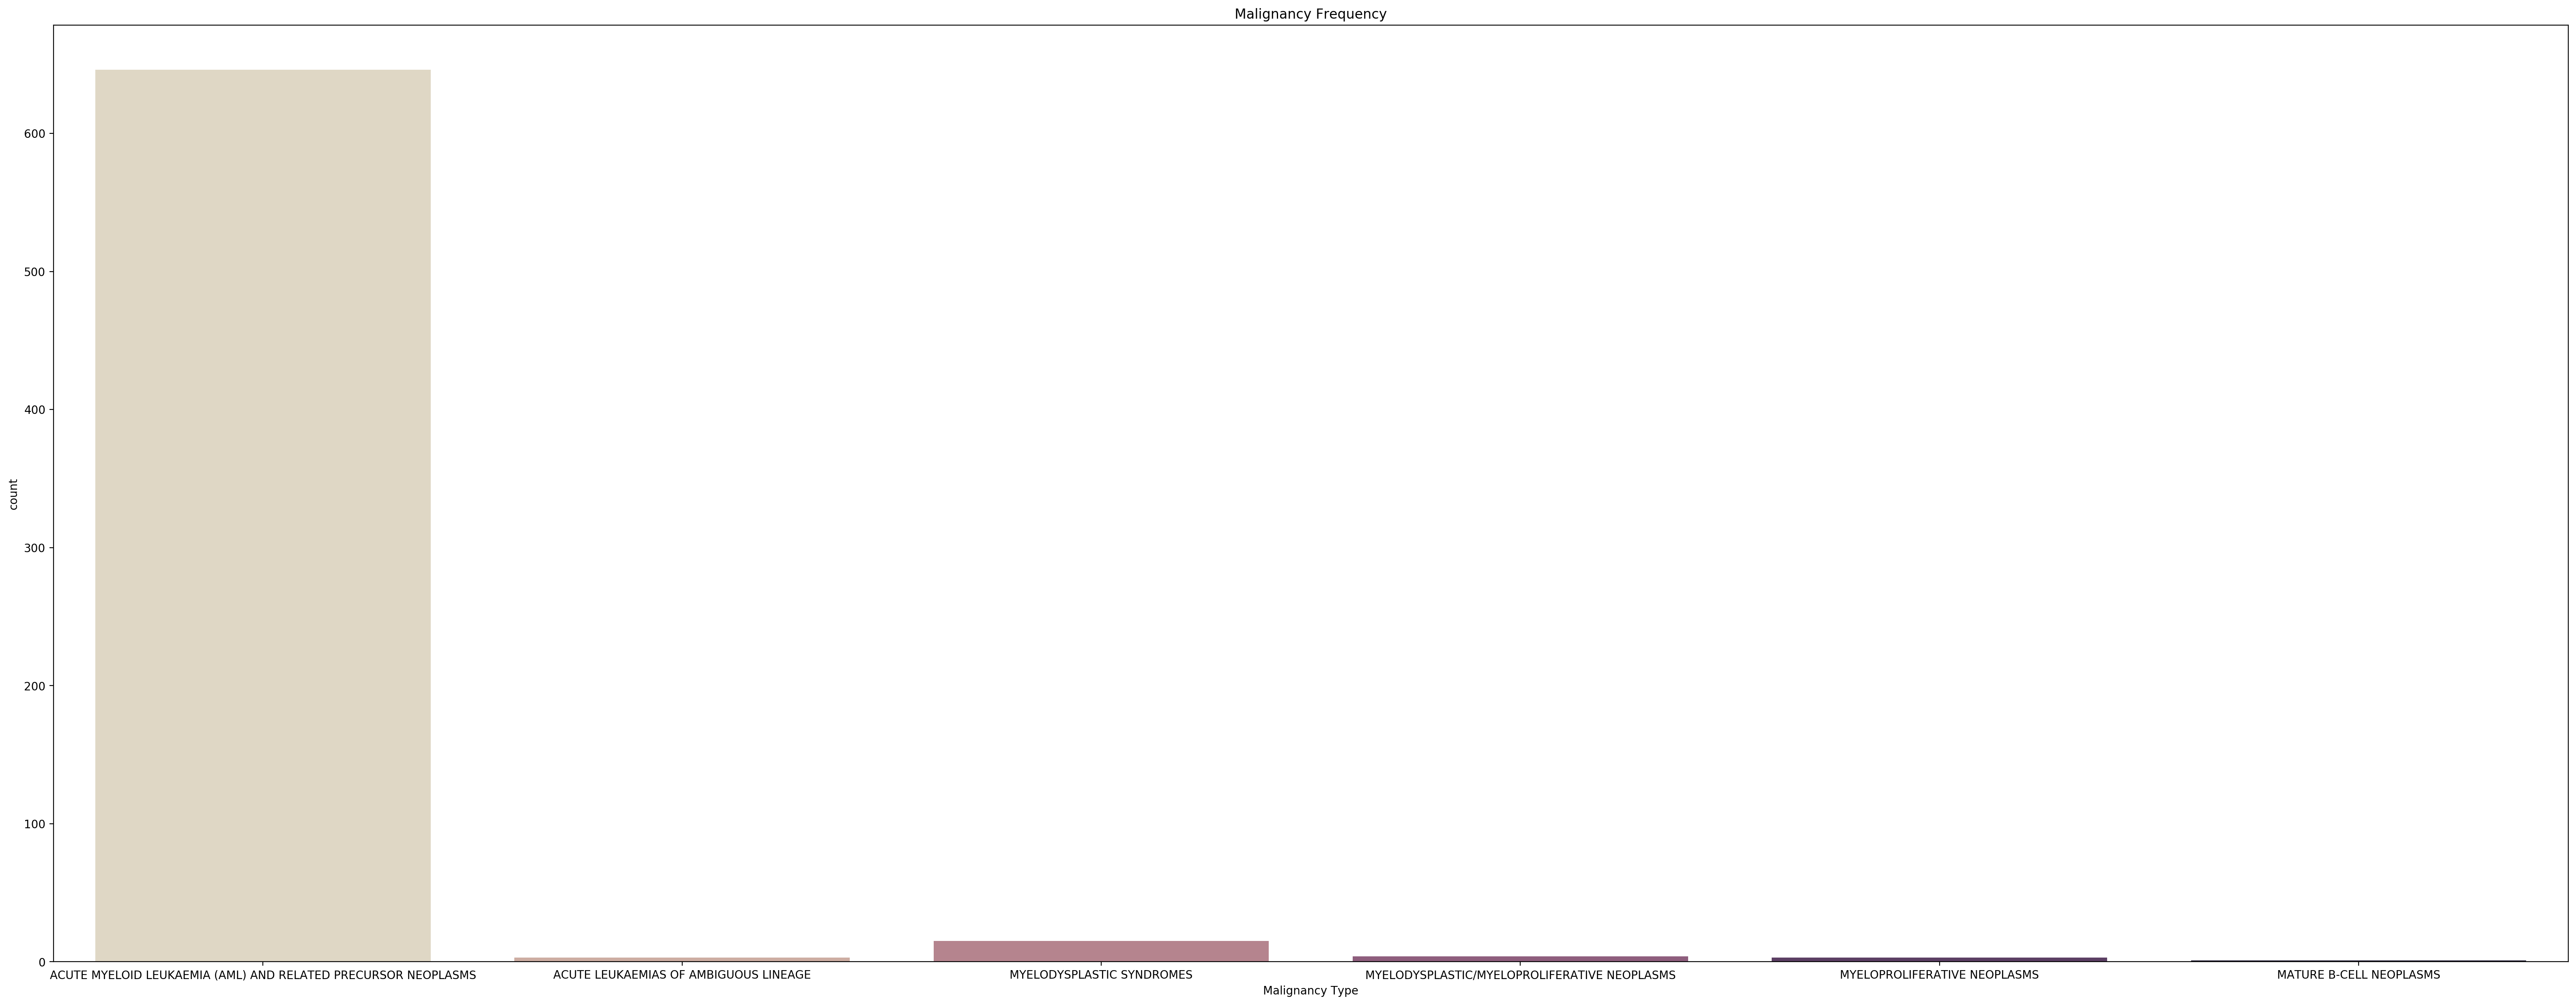

In [86]:
#Data Visualization
sns.countplot(x=df["dxAtSpecimenAcquisition"], palette = "ch:s=-.2,r=.6")
plt.xlabel('Malignancy Type')
plt.title('Malignancy Frequency')
plt.gcf().set_size_inches(40, 15)

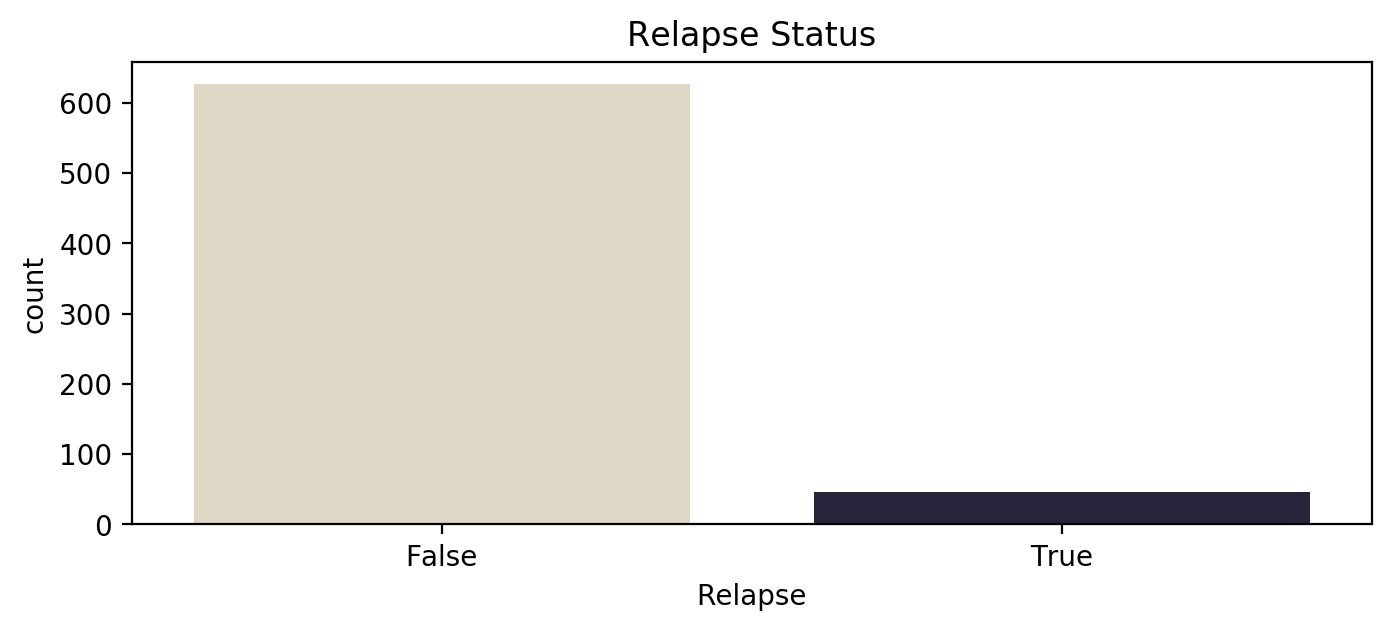

In [88]:
sns.countplot(x=df["isRelapse"], palette = "ch:s=-.2,r=.6")
plt.xlabel('Relapse')
plt.title('Relapse Status')
plt.gcf().set_size_inches(8, 3)

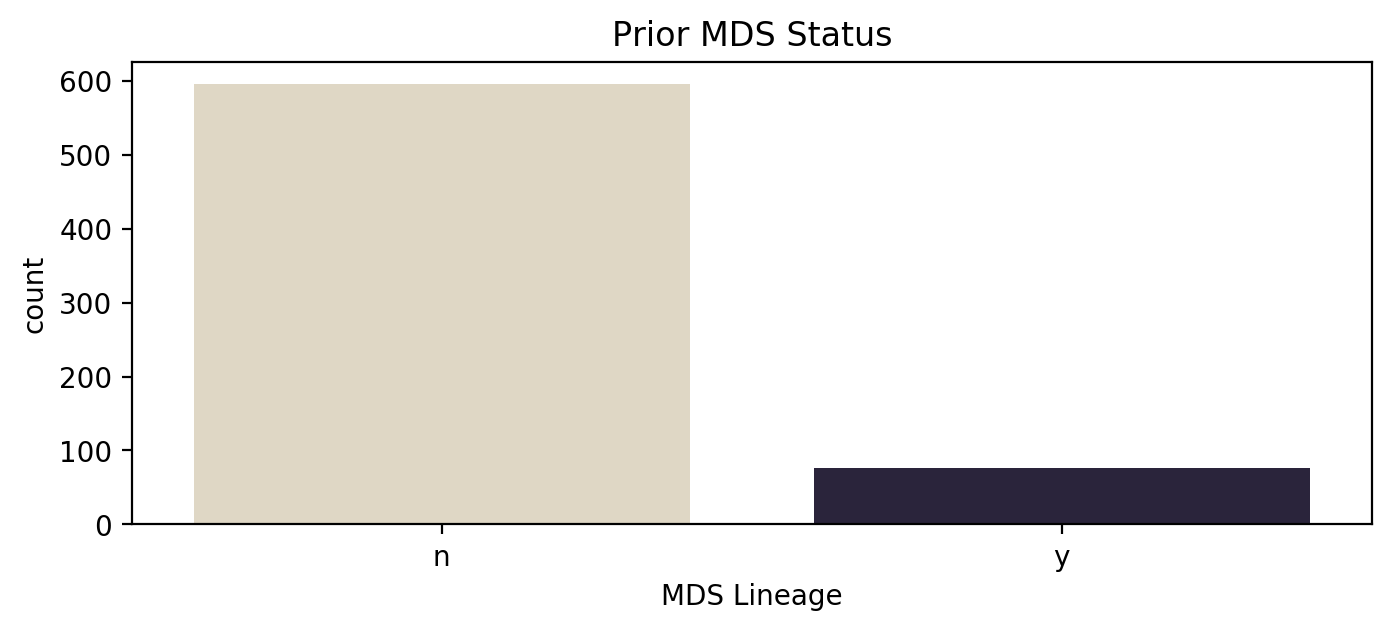

In [89]:
sns.countplot(x=df["priorMDS"], palette = "ch:s=-.2,r=.6")
plt.xlabel('MDS Lineage')
plt.title('Prior MDS Status')
plt.gcf().set_size_inches(8, 3)

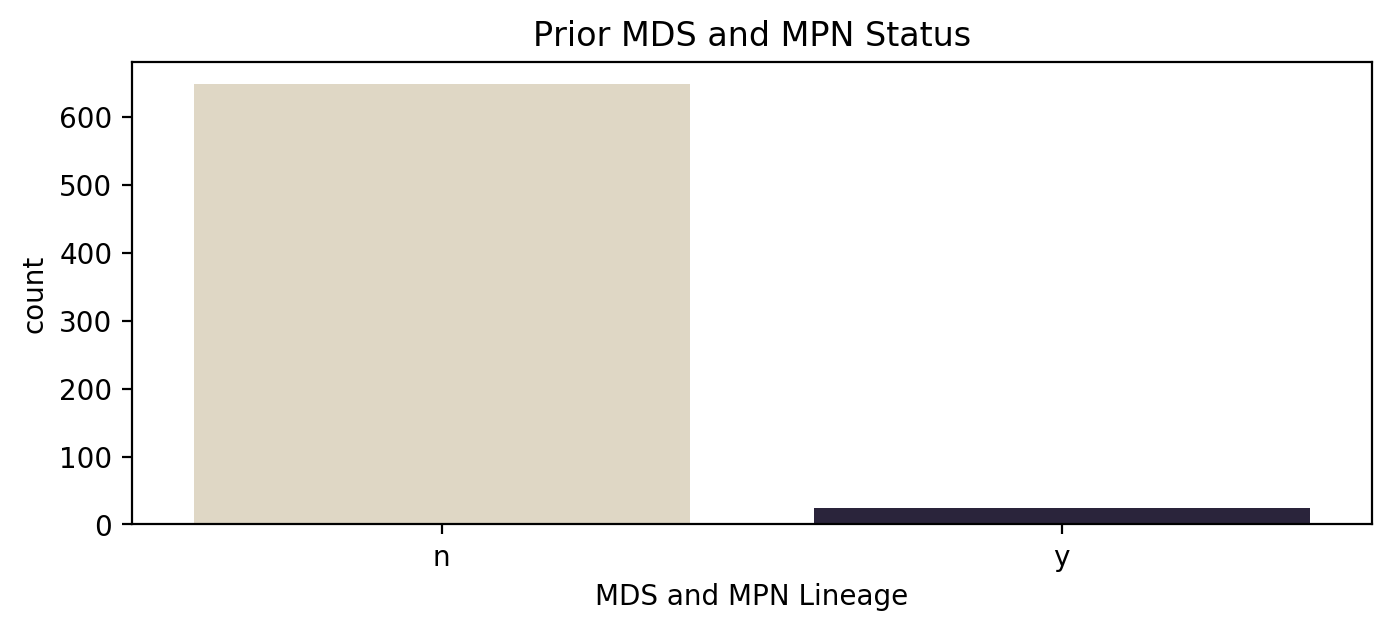

In [90]:
sns.countplot(x=df["priorMDSMPN"], palette = "ch:s=-.2,r=.6")
plt.xlabel('MDS and MPN Lineage')
plt.title('Prior MDS and MPN Status')
plt.gcf().set_size_inches(8, 3)

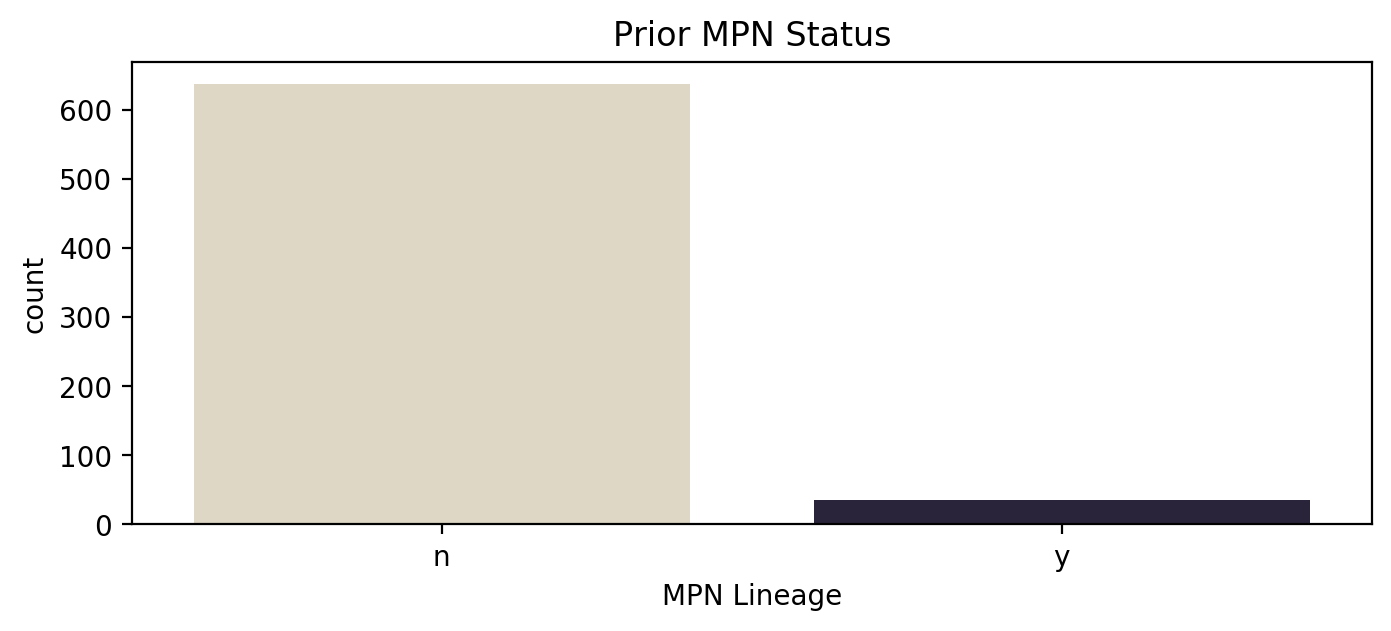

In [91]:
sns.countplot(x=df["priorMPN"], palette = "ch:s=-.2,r=.6")
plt.xlabel('MPN Lineage')
plt.title('Prior MPN Status')
plt.gcf().set_size_inches(8, 3)

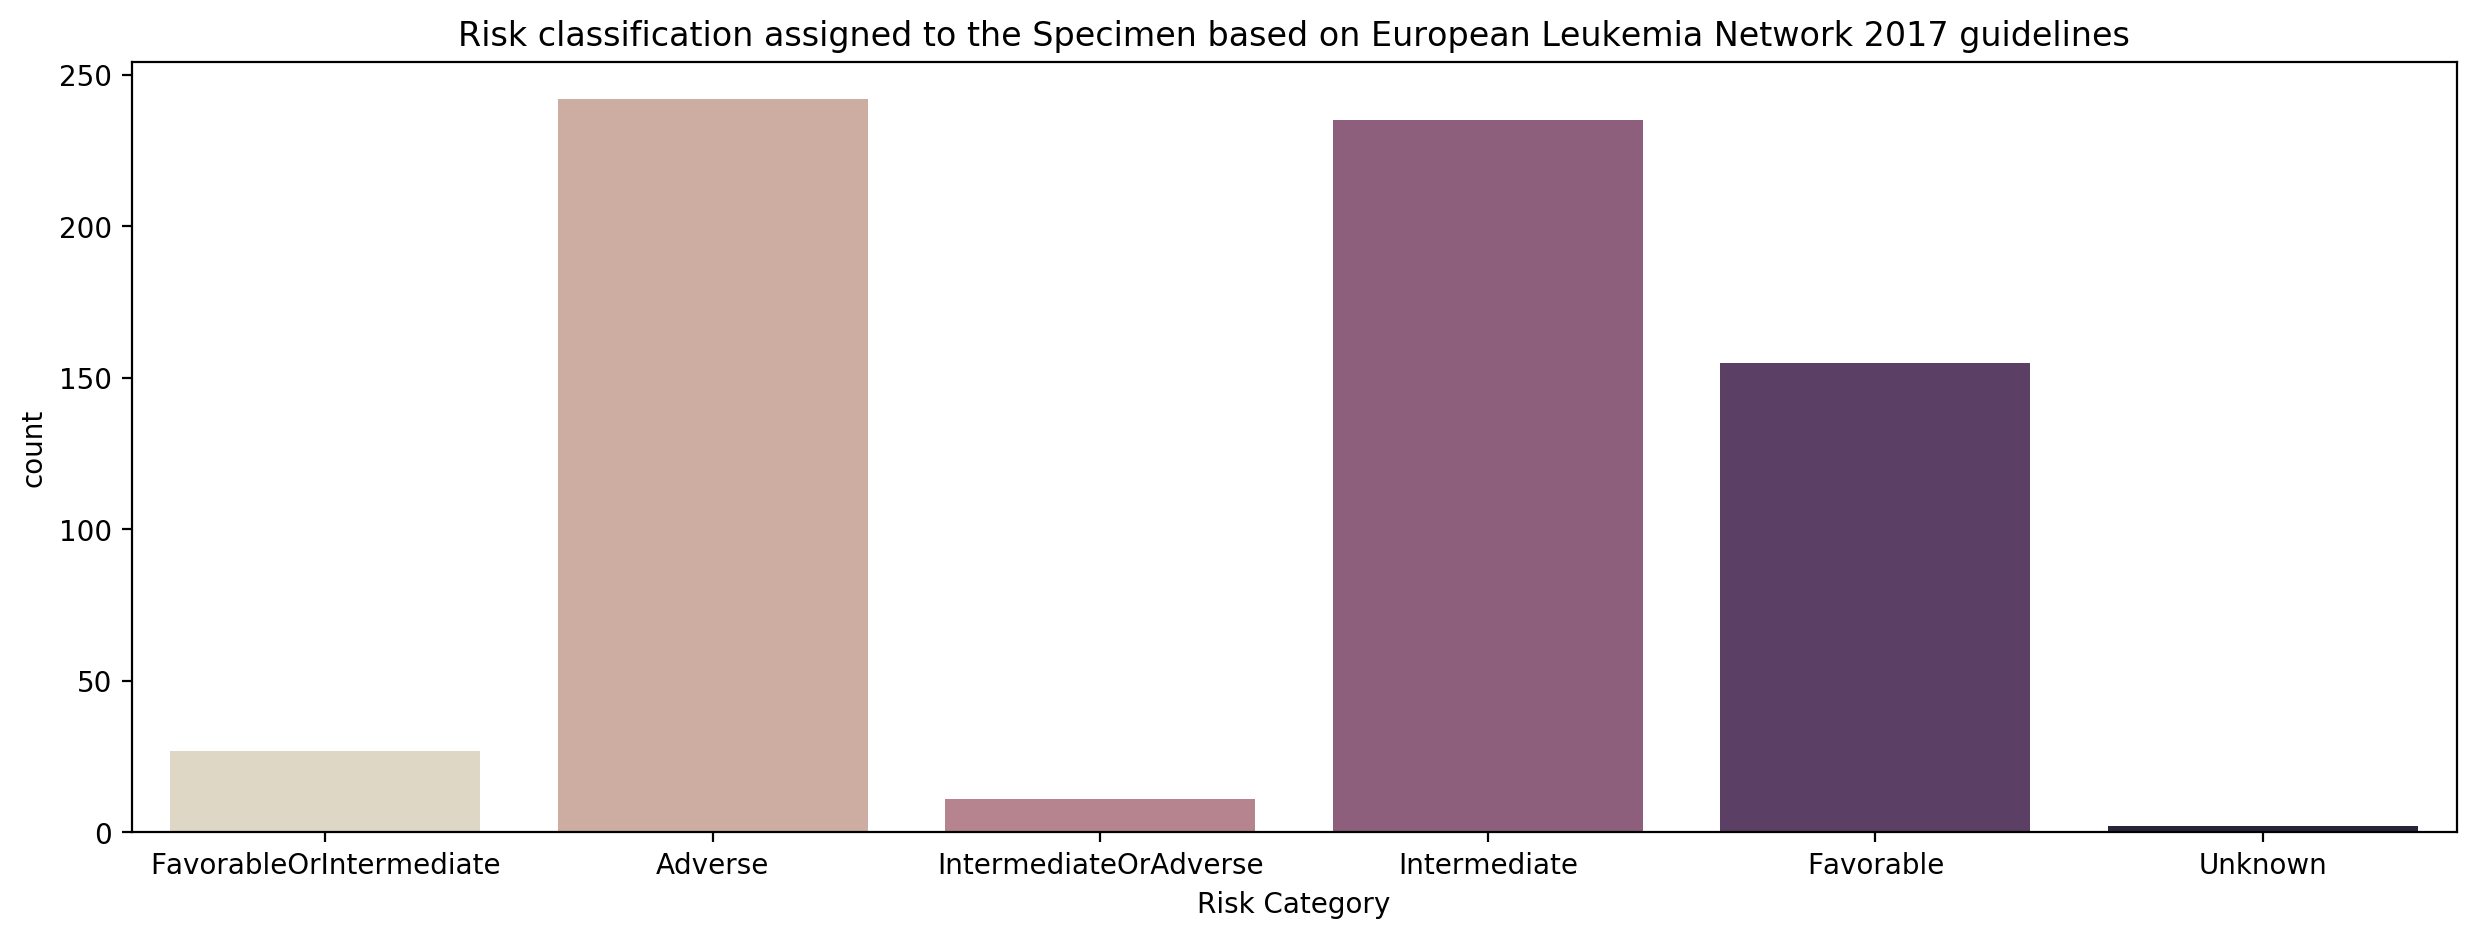

In [93]:
sns.countplot(x=df["ELN2017"], palette = "ch:s=-.2,r=.6")
plt.xlabel('Risk Category')
plt.title('Risk classification assigned to the Specimen based on European Leukemia Network 2017 guidelines')
plt.gcf().set_size_inches(15, 5)

Text(0.5, 1.0, 'Survival Against NPM1 Mutation')

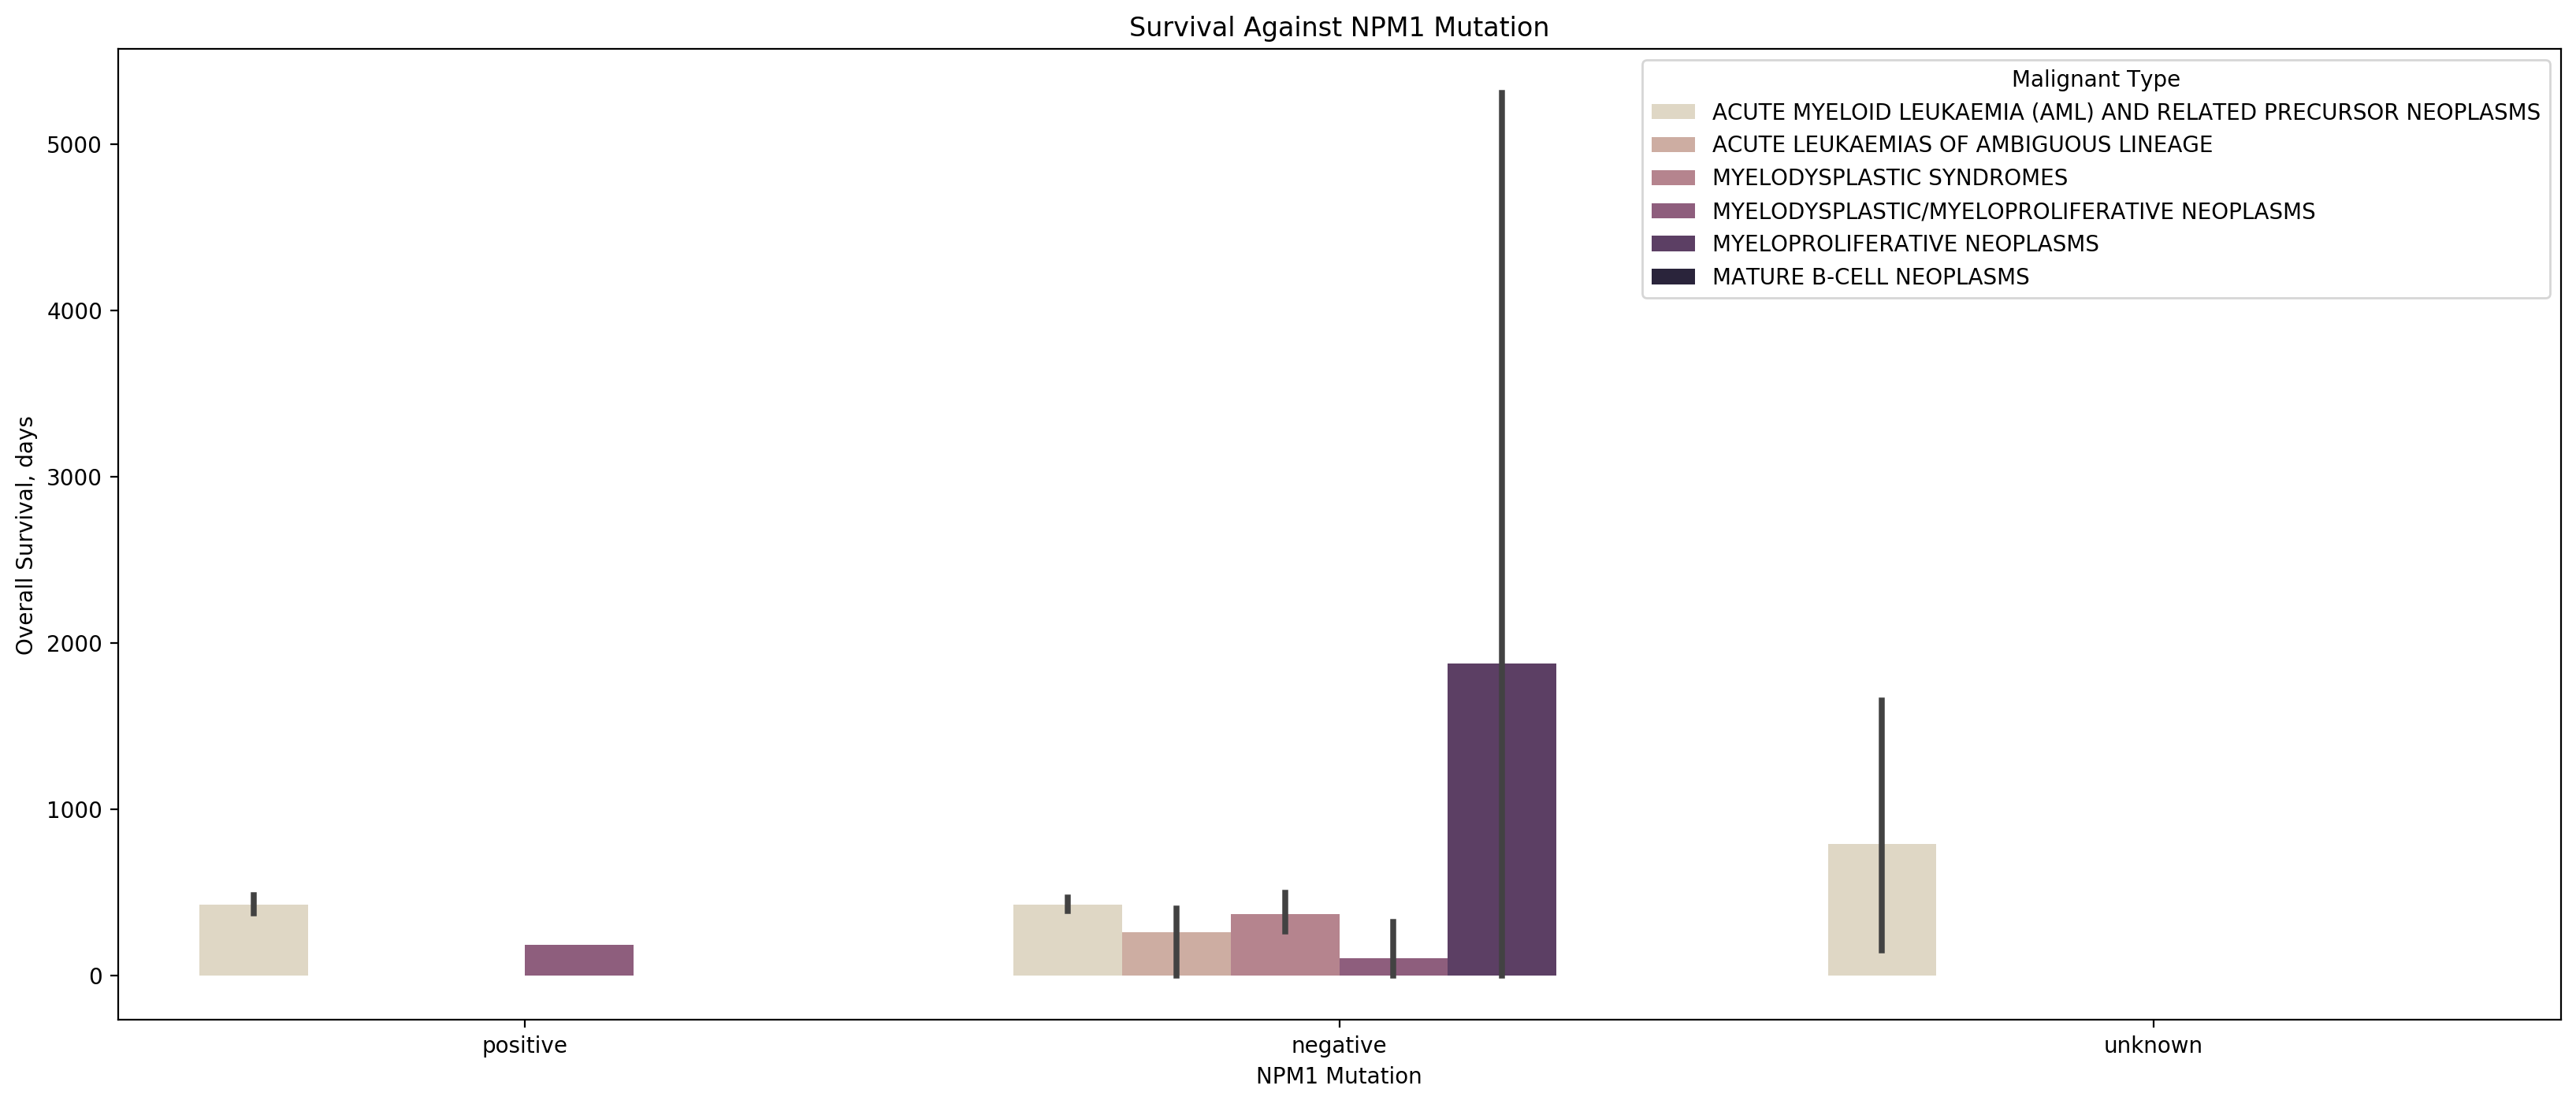

In [97]:
sns.barplot(data= df,x = 'NPM1', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('NPM1 Mutation')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against NPM1 Mutation")

Text(0.5, 1.0, 'Survival Against FLT3-ITD Mutation')

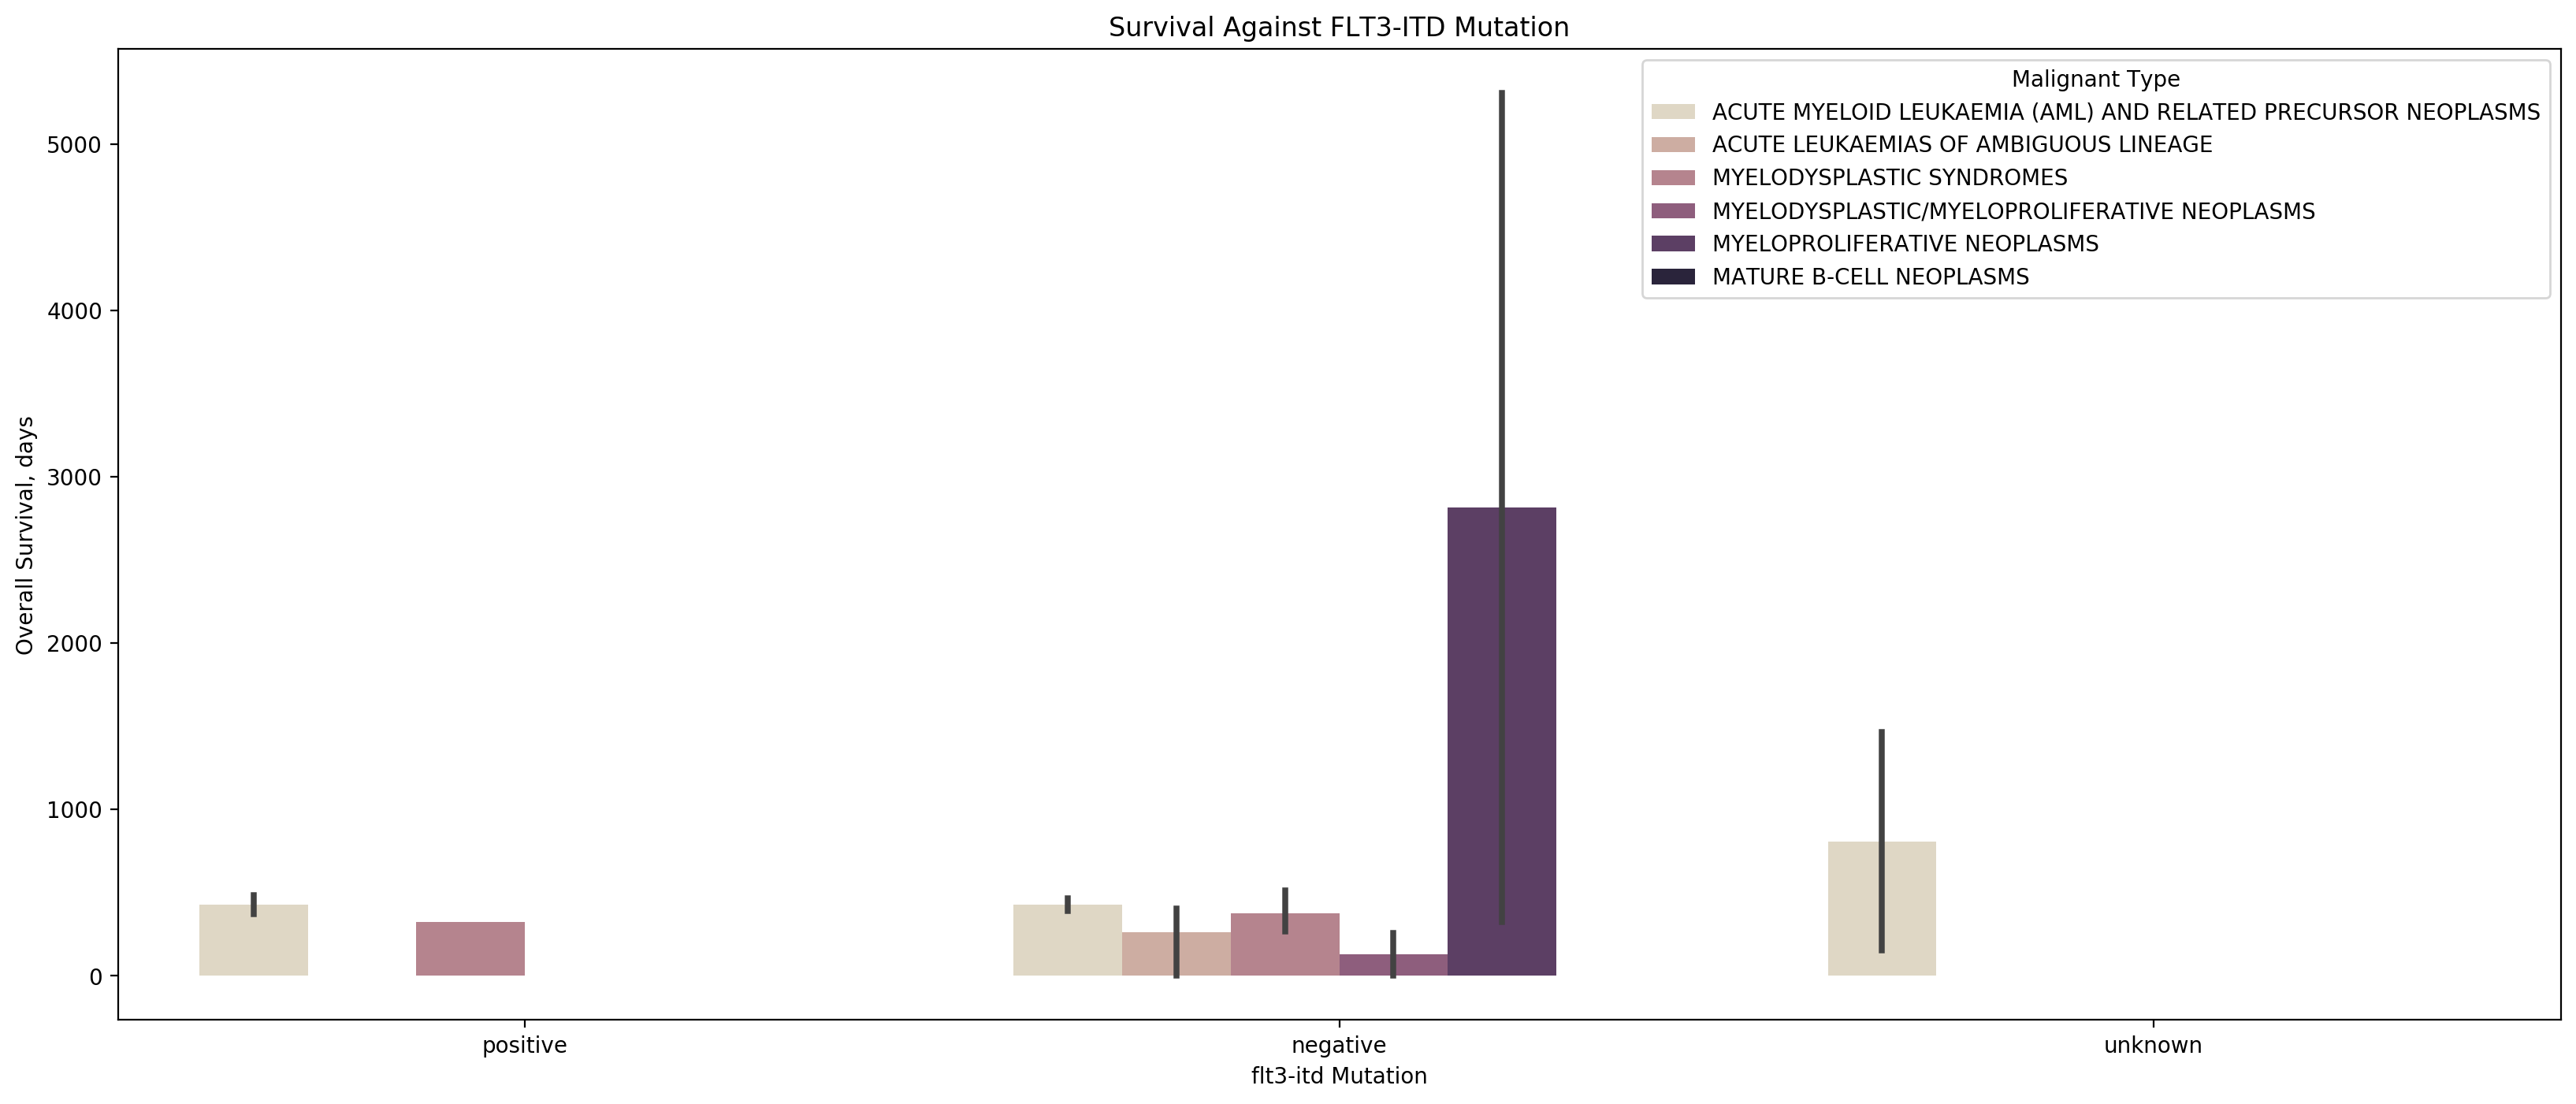

In [99]:
sns.barplot(data= df,x = 'FLT3-ITD', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('flt3-itd Mutation')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against FLT3-ITD Mutation")

Text(0.5, 1.0, 'Survival Against Risk classification assigned to the Specimen based on European Leukemia Network 2017 guidelines')

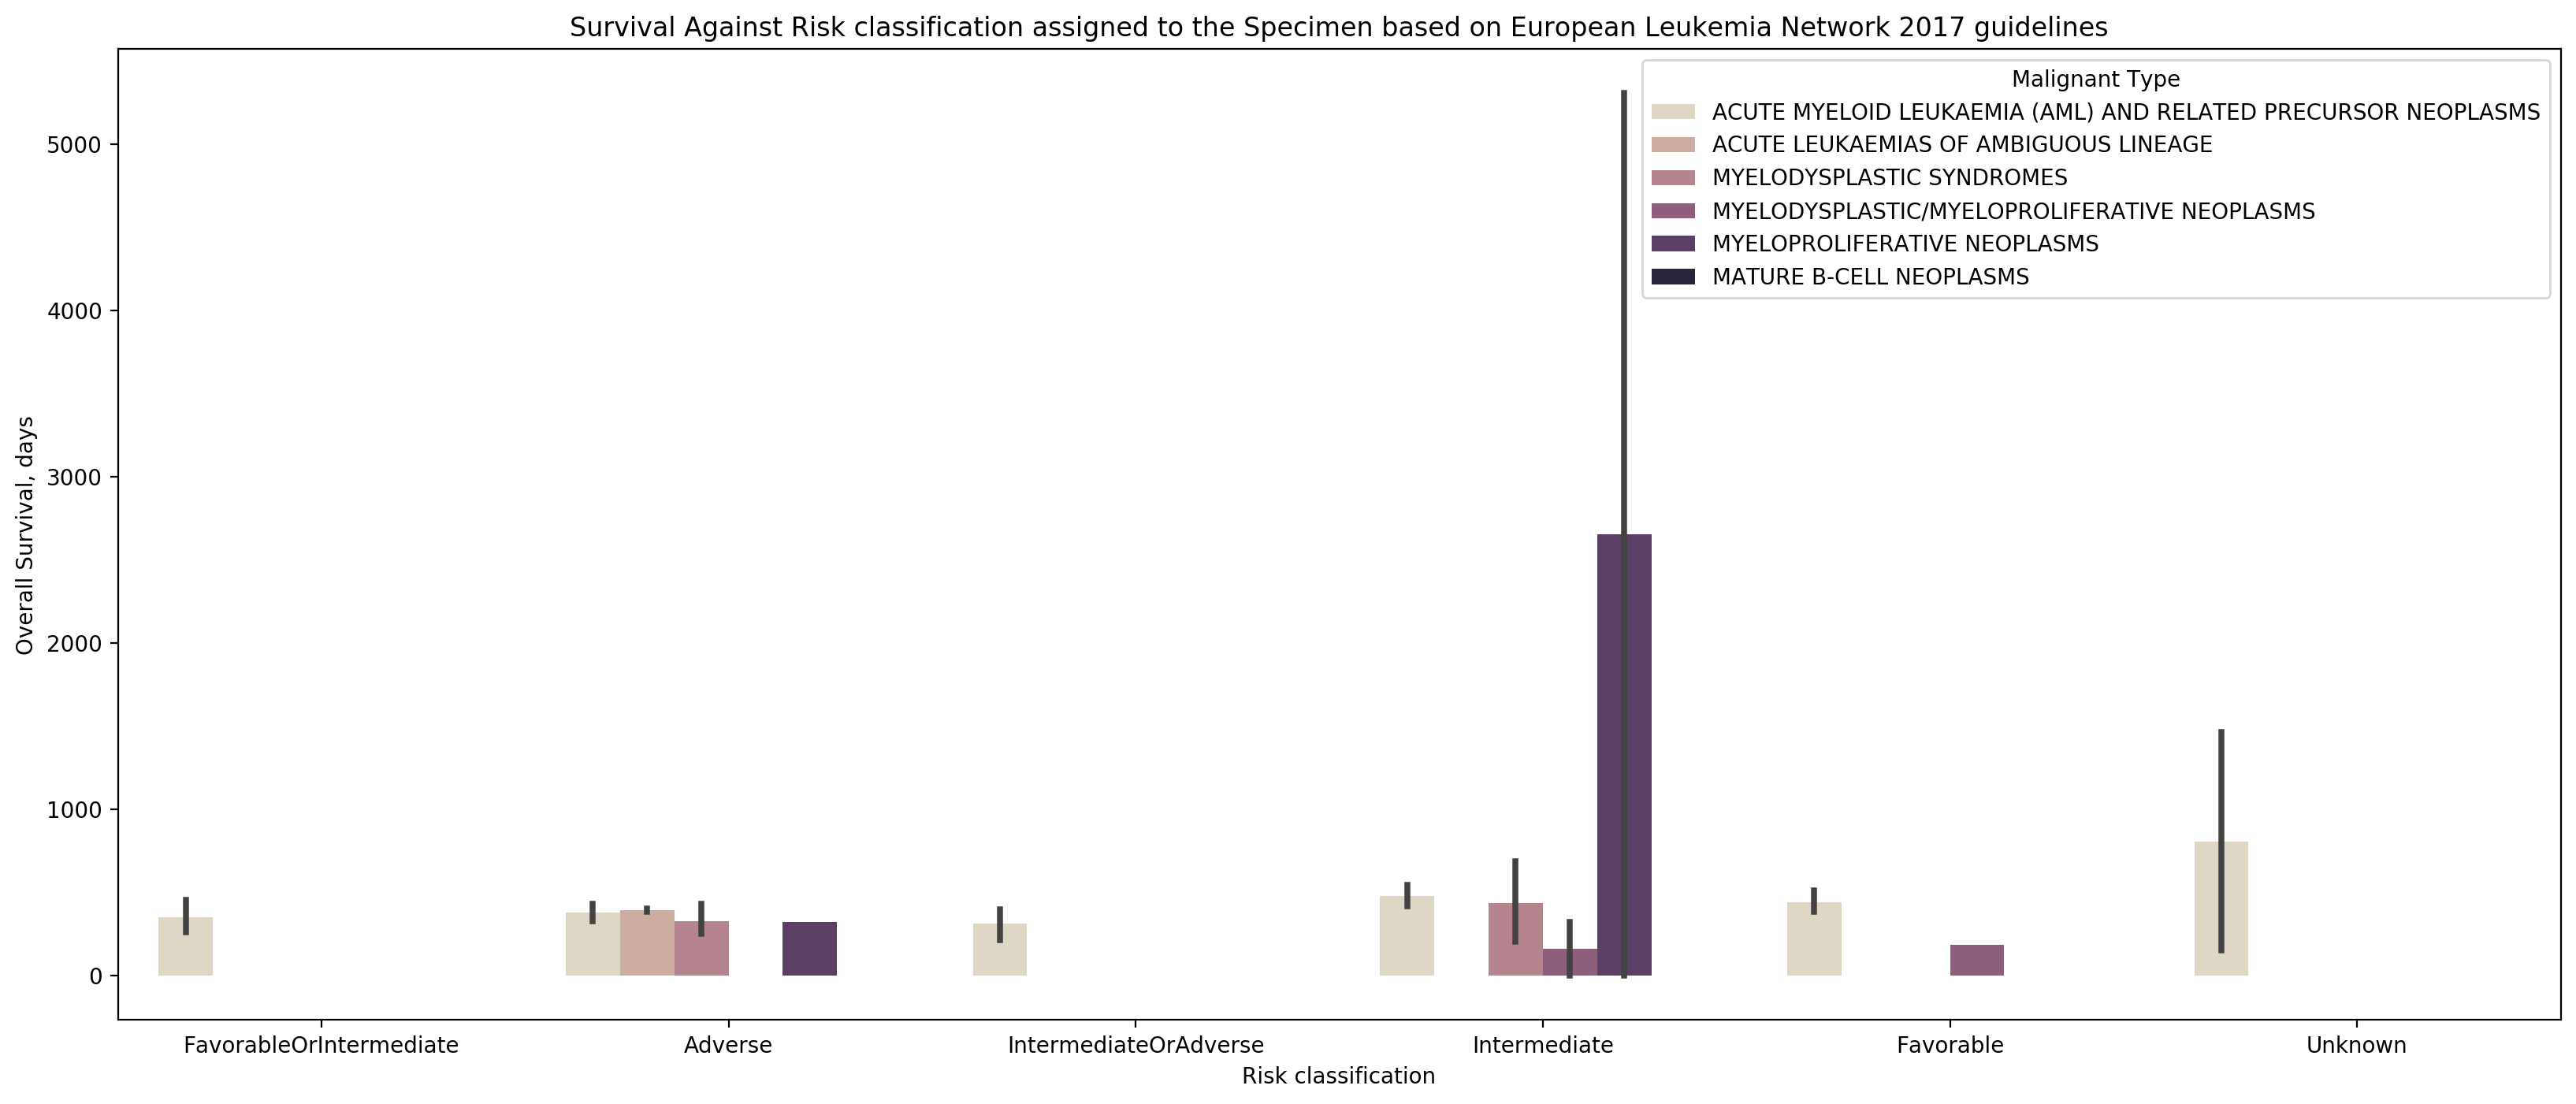

In [100]:
sns.barplot(data= df,x = 'ELN2017', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('Risk classification')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against Risk classification assigned to the Specimen based on European Leukemia Network 2017 guidelines")

Text(0.5, 1.0, 'Survival Against Prior MDS Diagnosis')

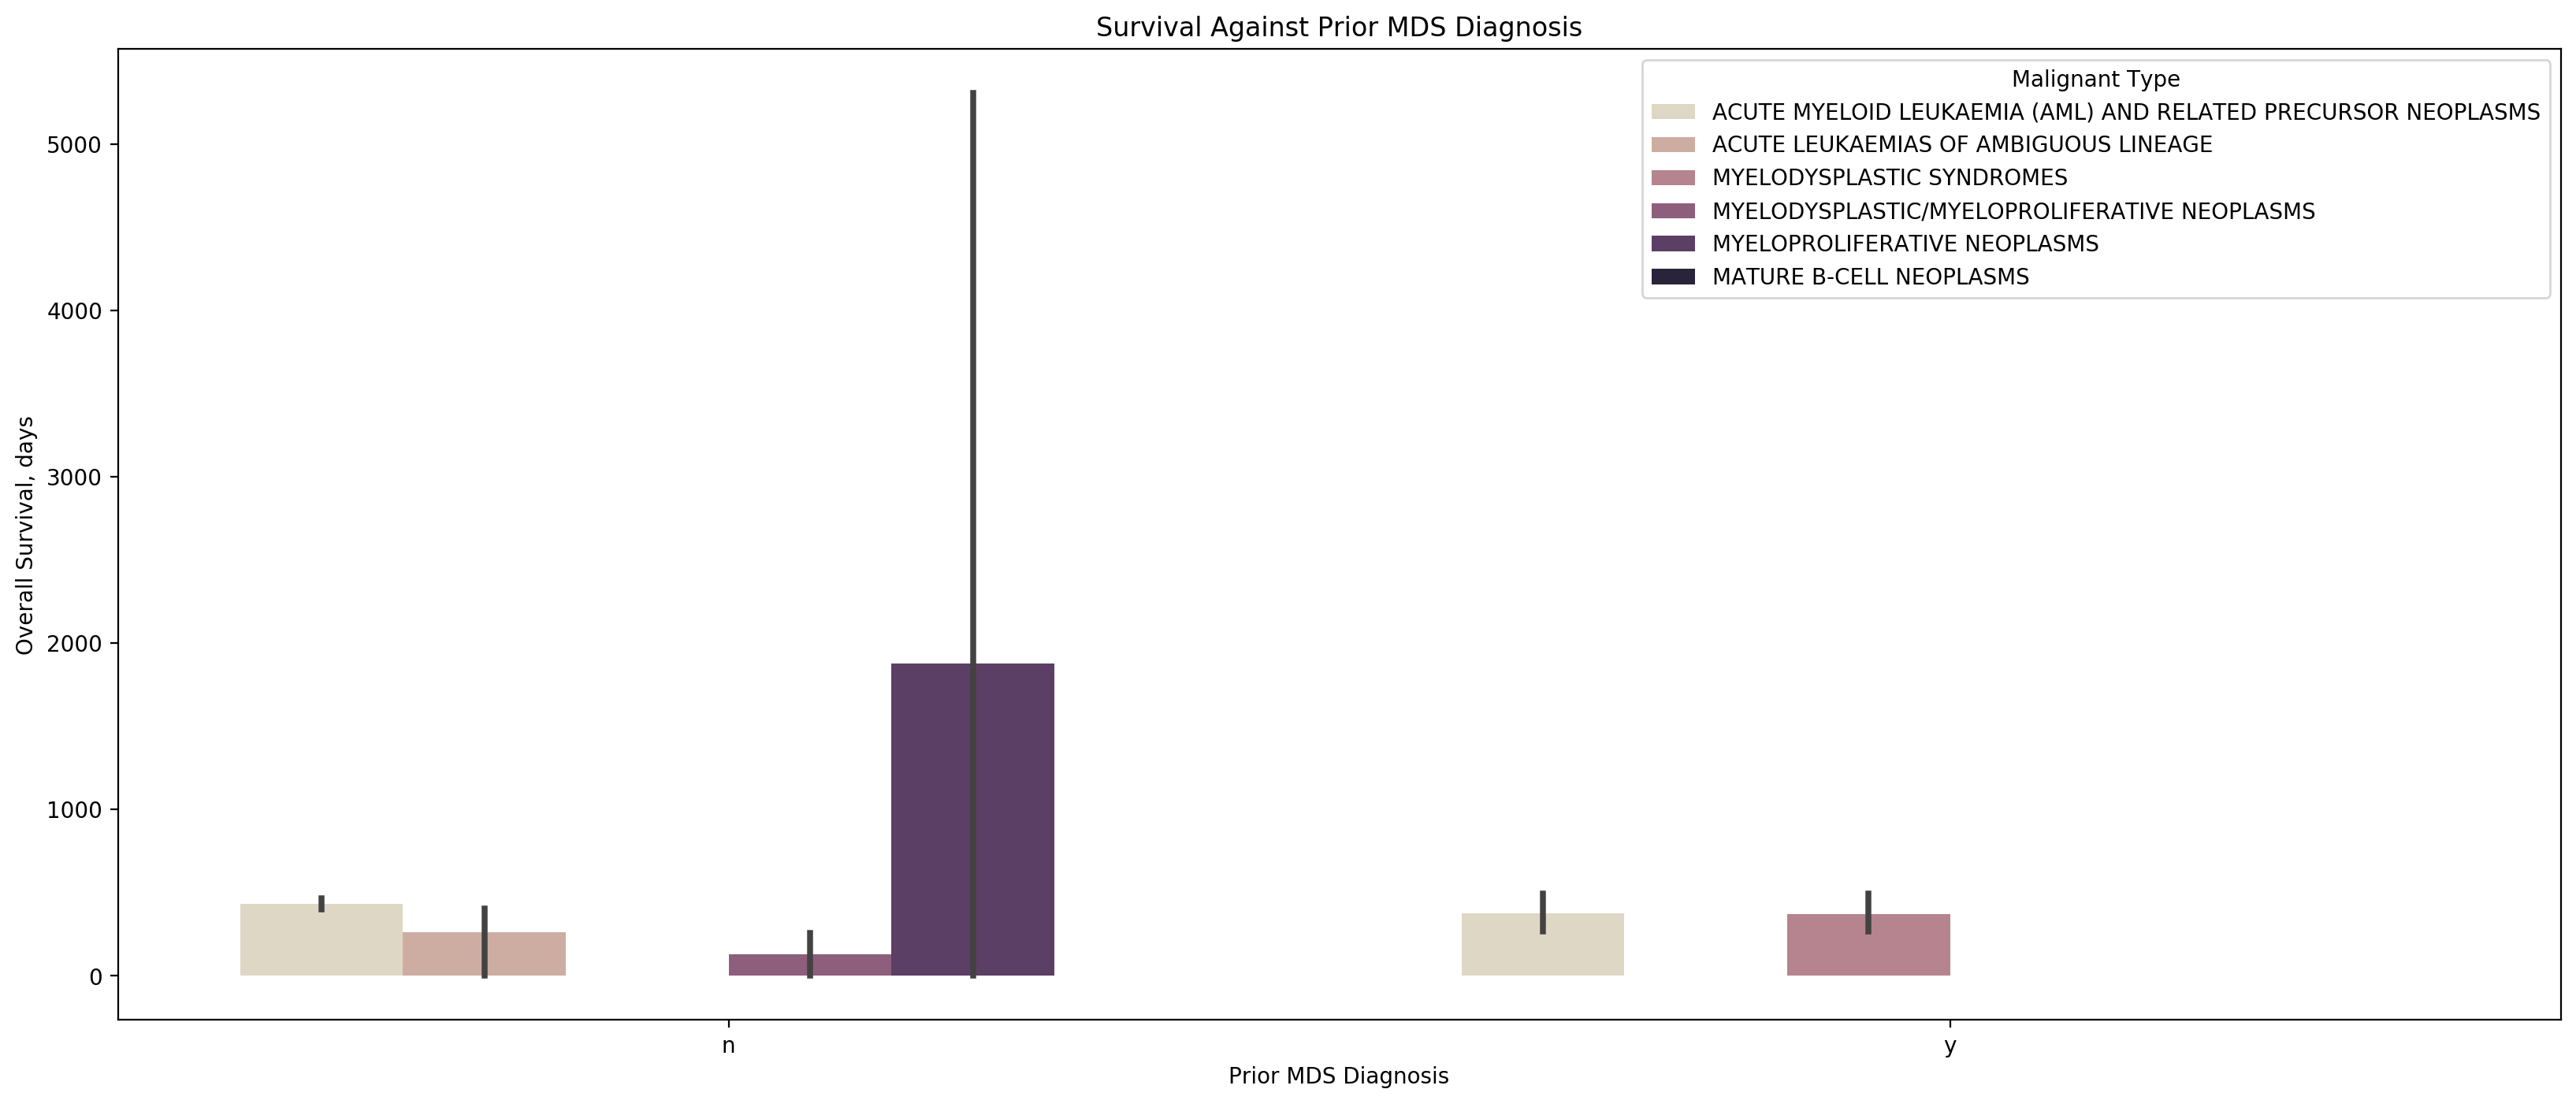

In [101]:
sns.barplot(data= df,x = 'priorMDS', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('Prior MDS Diagnosis')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against Prior MDS Diagnosis")

Text(0.5, 1.0, 'Survival Against Prior MDS and MPN Diagnosis')

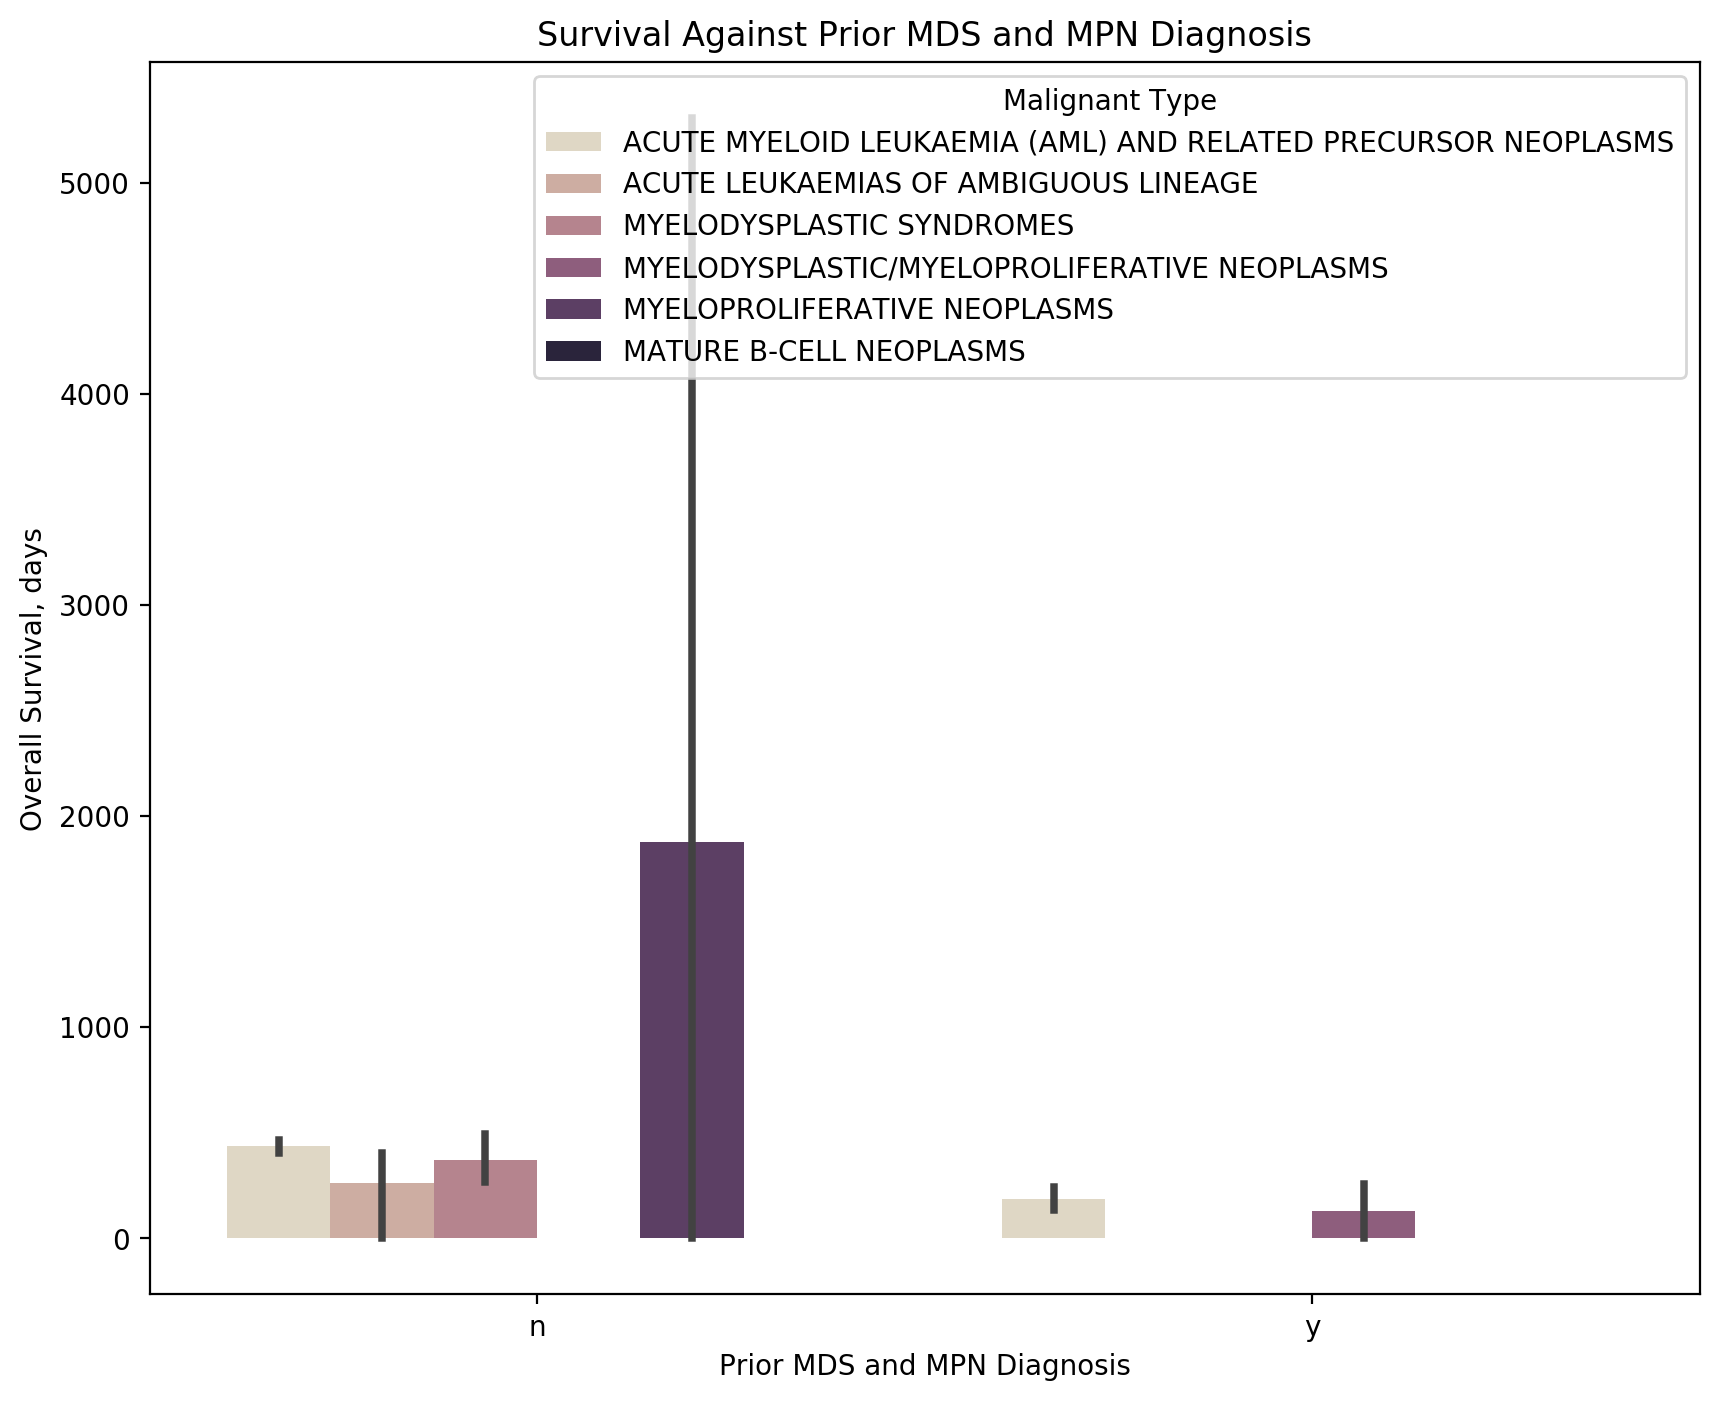

In [102]:
sns.barplot(data= df,x = 'priorMDSMPN', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(10, 8)
plt.xlabel('Prior MDS and MPN Diagnosis')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against Prior MDS and MPN Diagnosis")

Text(0.5, 1.0, 'Survival Against Prior MPN Diagnosis')

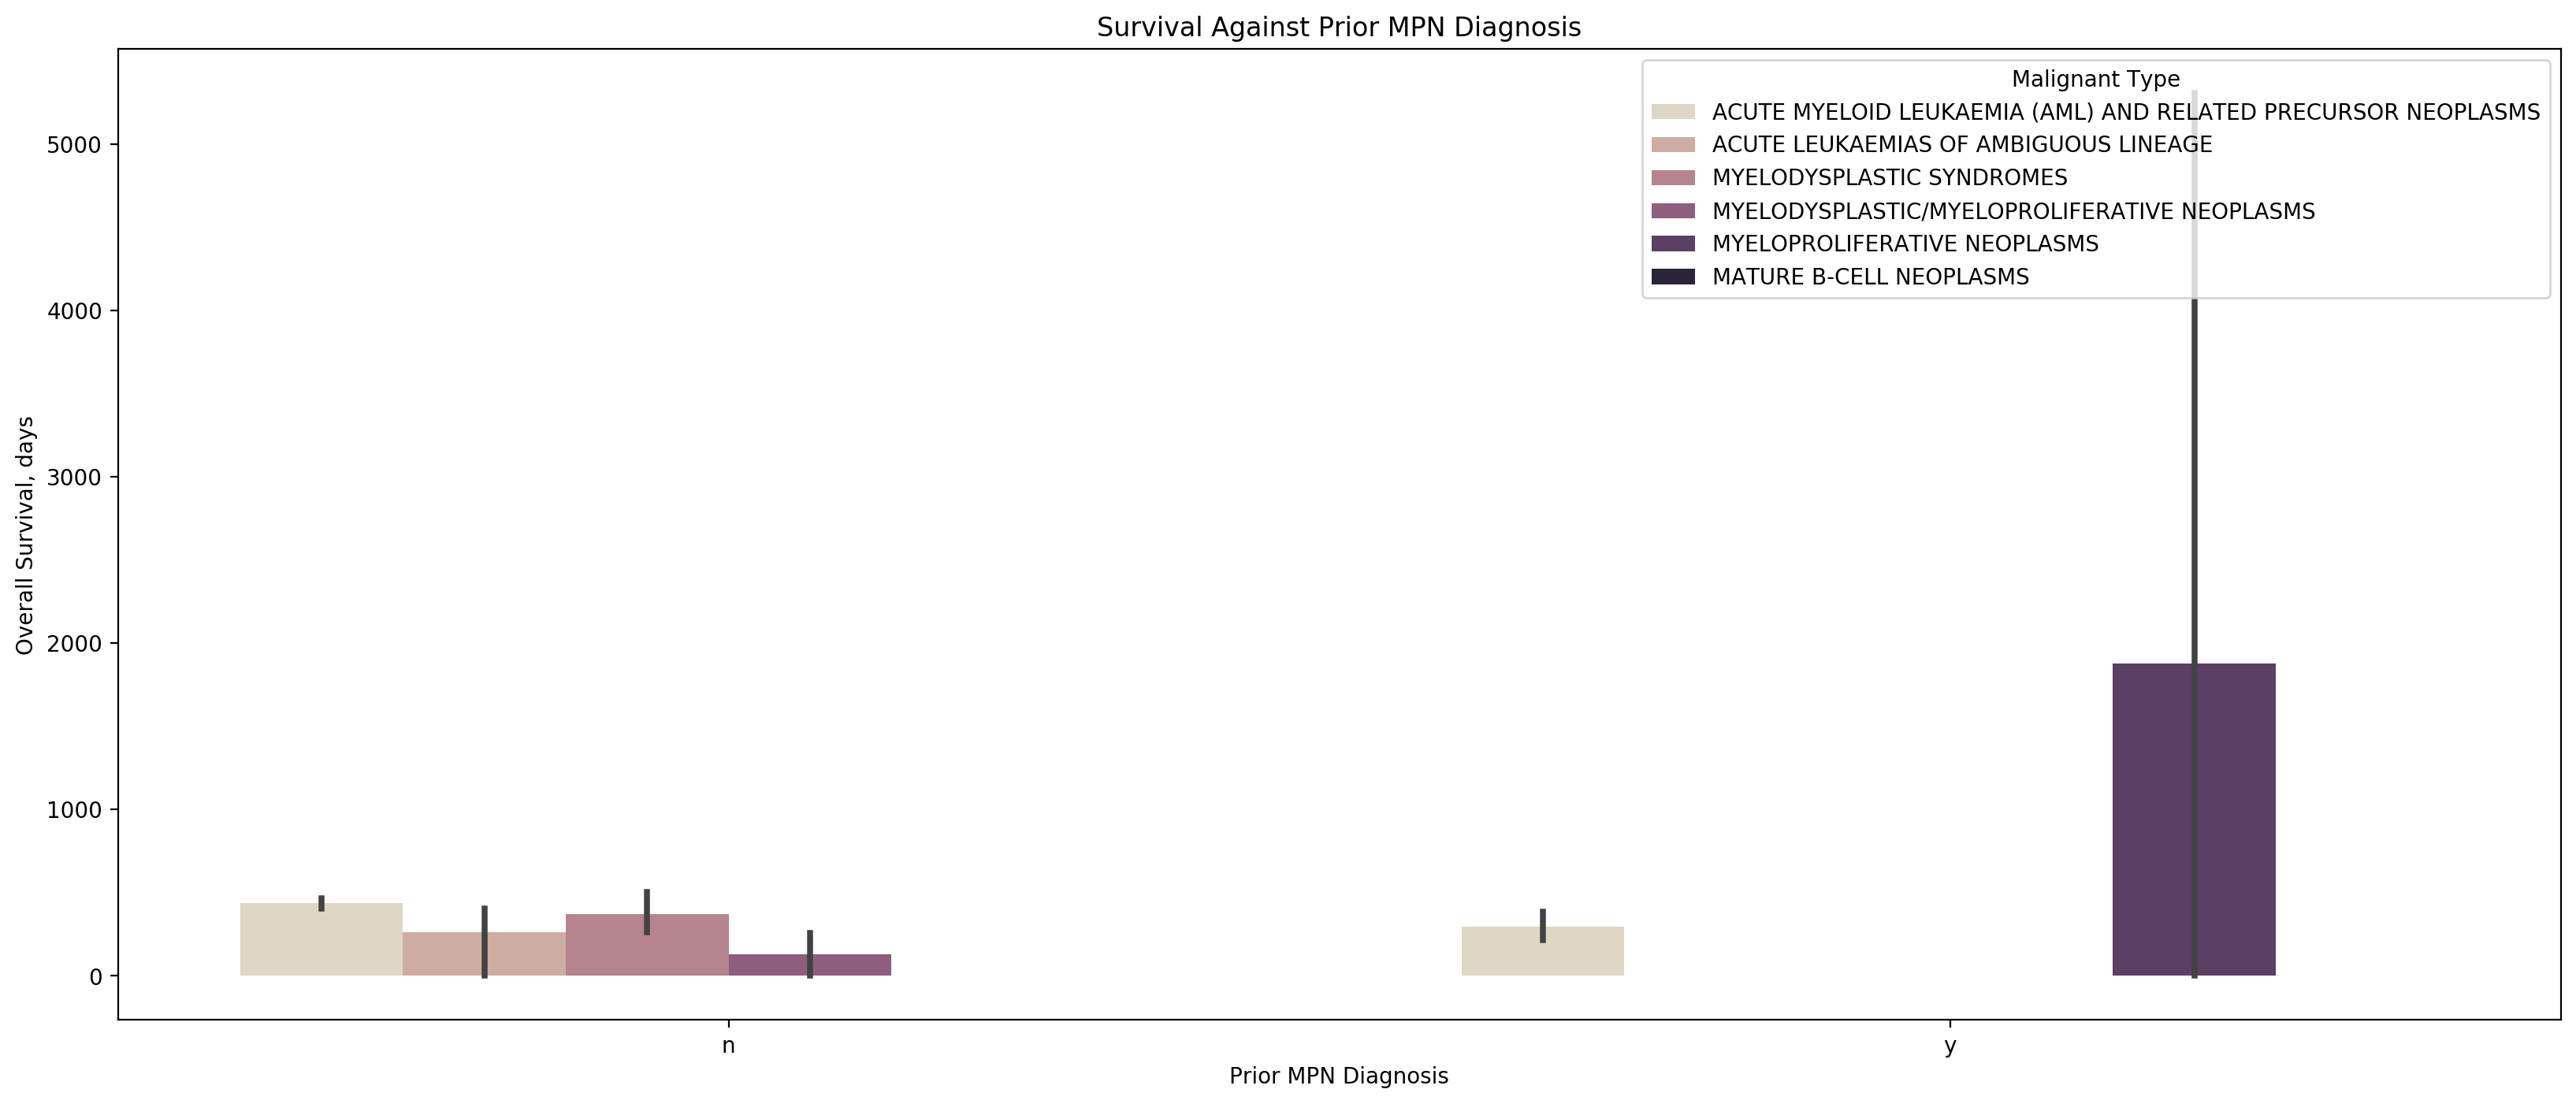

In [103]:
sns.barplot(data= df,x = 'priorMPN', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('Prior MPN Diagnosis')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against Prior MPN Diagnosis")

Text(0.5, 1.0, 'Survival Against Prior Non-Myeloid Diagnosis')

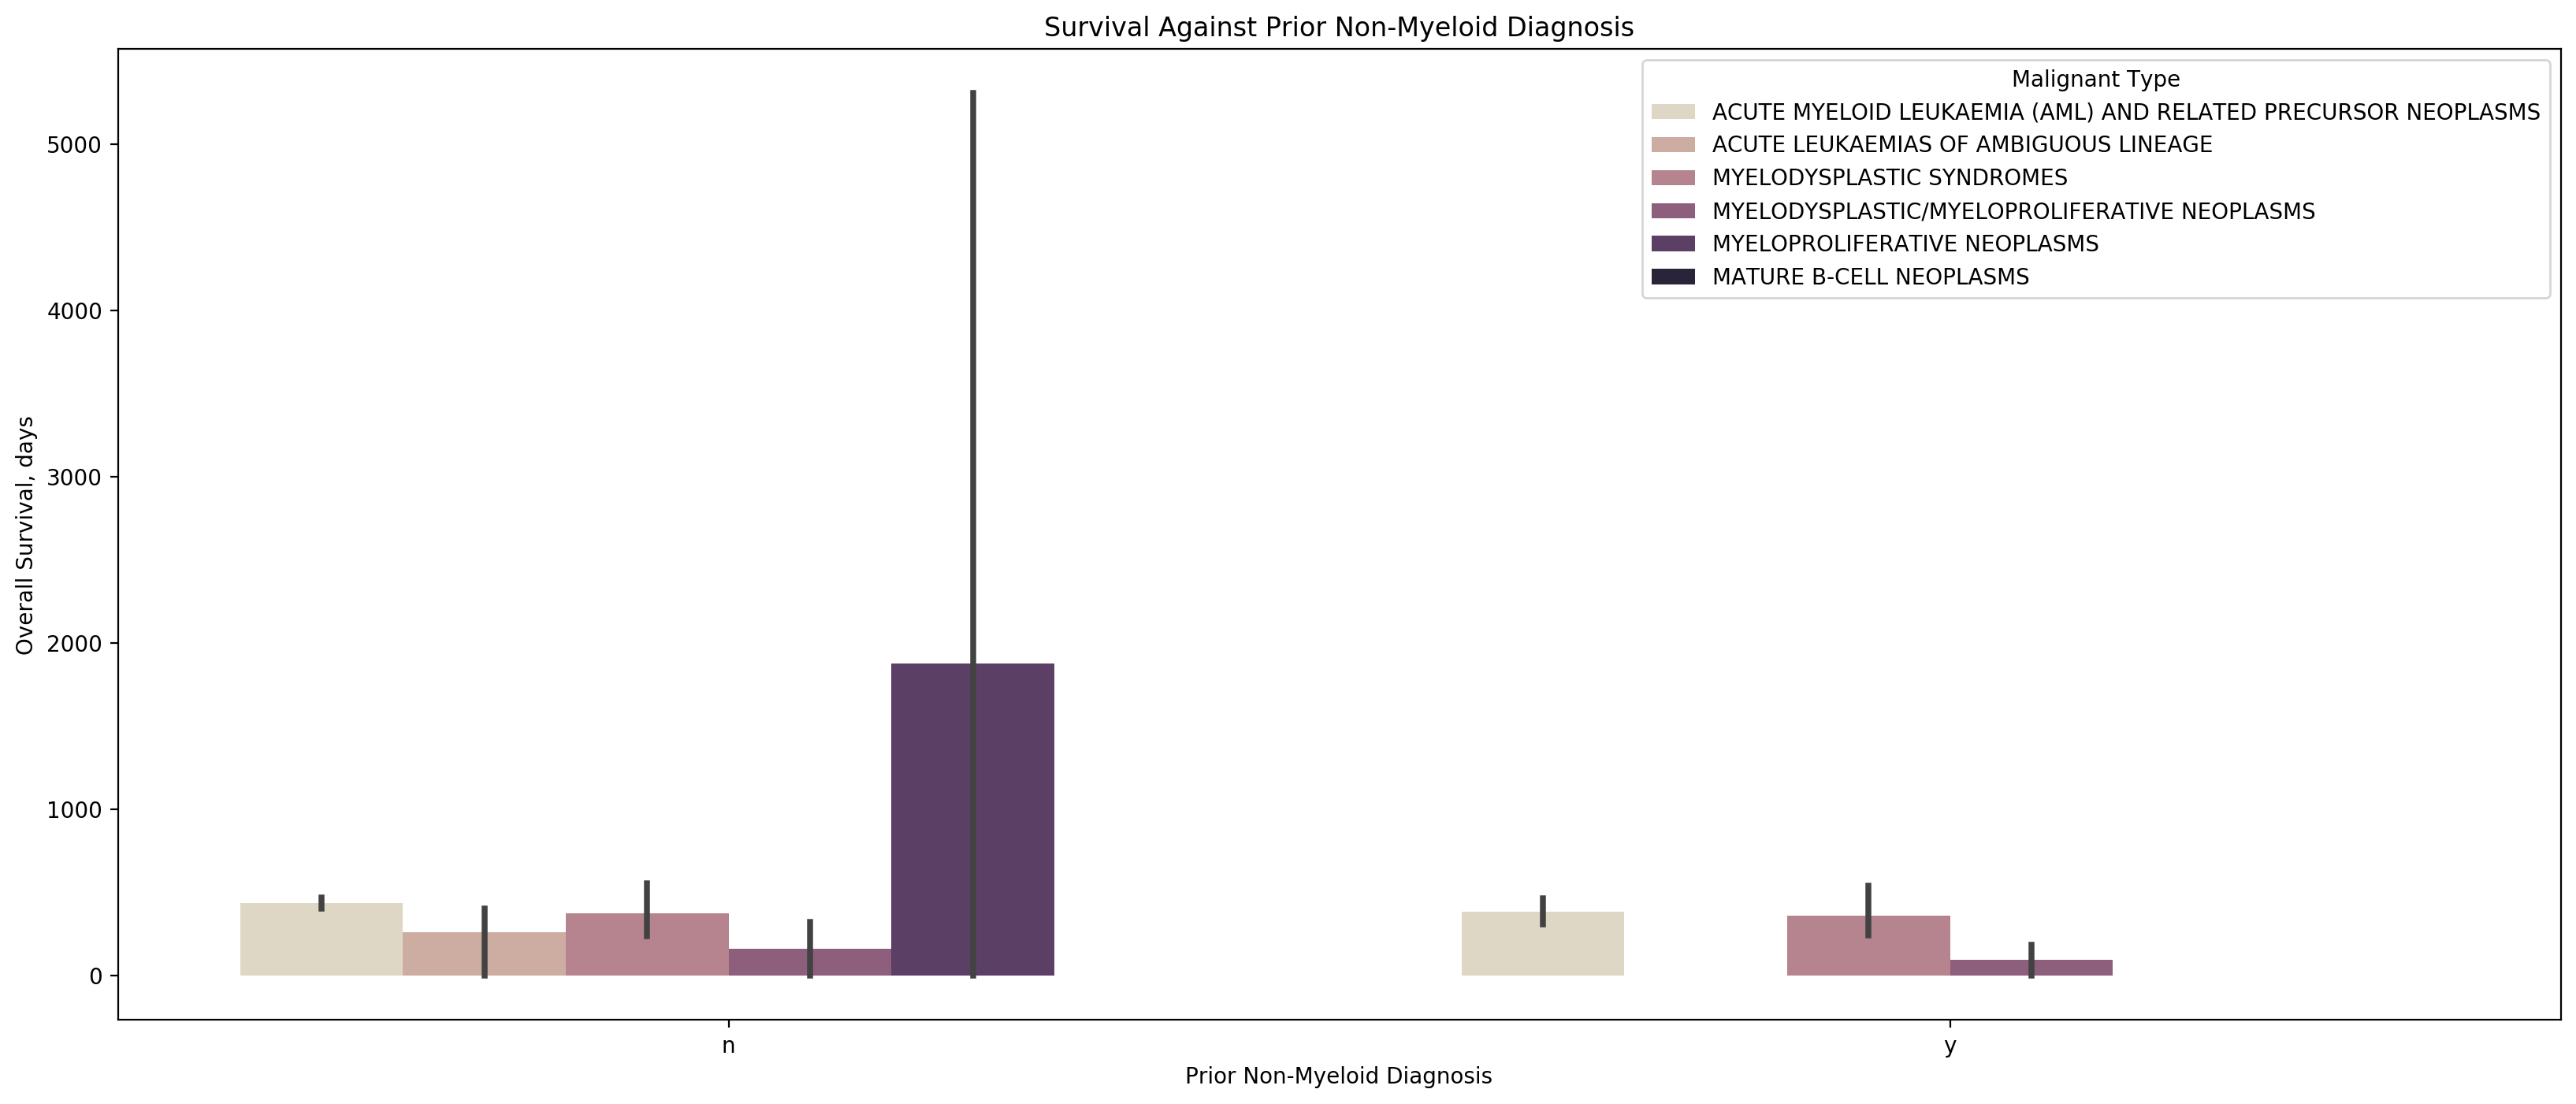

In [104]:
sns.barplot(data= df,x = 'priorMalignancyNonMyeloid', y = 'overallSurvival', 
            hue = 'dxAtSpecimenAcquisition', palette = "ch:s=-.2,r=.6")
plt.gcf().set_size_inches(20, 8)
plt.xlabel('Prior Non-Myeloid Diagnosis')
plt.ylabel('Overall Survival, days')
plt.legend(loc='upper right', title = 'Malignant Type')
plt.title("Survival Against Prior Non-Myeloid Diagnosis")



In [127]:
#Release resources
%%html

<p><b>Shutting down your kernel for this notebook to release resources.</b></p>
<button class="sm-command-button" data-commandlinker-command="kernelmenu:shutdown" style="display:none;">Shutdown Kernel</button>

<script>
try {
    els = document.getElementsByClassName("sm-command-button");
    els[0].click();
}
catch(er) {
    // NoOp
}
</script>

SyntaxError: invalid syntax (<ipython-input-127-671846776ce3>, line 4)

In [124]:
%%javascript

try {
    Jupyter.notebook.save_checkpoint();
    Jupyter.notebook.session.delete();
}
catch(err) {
    // NoOp
}

<IPython.core.display.Javascript object>